# Introduction

Some of the Wold lab low input RNA-Seq libraries accidentially went through the normal RNA-Seq pipeline, and performed poorer than we expected. This turned out to be because we were incorrectly computing the Pearson and Spearman correlations.

However we also discovered that the experimental single-cell like 13 picogram data would never meet the robustness of experiments with larger starting nucleic acid amounts. One important question that was raised was is there a way to verify that the 13 picogram experiments were of sufficiently quality to be used by others.

# Setup

* <a href="#Load-experiment-data">Load experiment data</a>
  * <a href="#Load-13-pg-tissue-experiments">Load 13 pg tissue experiments</a>
    * <a href="#List-loaded-13-pg-tissue-experiments">List loaded 13 pg tissue experiments</a>
    * <a href="#List-13-pg-tissue-libraries-and-files">List 13 pg tissue libraries and files</a>
    * <a href="#Example-13-pg-tissue-correlation-scores">Example 13 pg tissue correlation scores</a>
  * <a href="#Load-10-ng-tissue-experiments">Load 10 ng tissue experiments</a>
    * <a href="#List-loaded-10-ng-tissue-experiments">List loaded 10 ng tissue experiments</a>
    * <a href="#List-10-ng-tissue-libraries-and-files">List 10 ng tissue libraries and files</a>
    * <a href="#Example-10-ng-tissue-correlation-scores">Example 10 ng tissue correlation scores</a>
  * <a href="#Load-ENCODE-bulk-cell-line-experiments">Load ENCODE bulk cell line experiments</a>
    * <a href="#List-Bulk-ENCODE-bulk-cell-line-libraries-and-files">List ENCODE bulk cell line libraries and files</a>
    * <a href="#Example-ENCODE-bulk-cell-line-correlation-scores">Example ENCODE bulk cell line correlation scores</a>  
* <a href="#Load-Gencode-Gene-ID-to-Gene-Name">Load gencode gene id to gene name translation table</a>
* <a href="#Generate-DCC-Library-to-Human-Readable-Names">Generate DCC Library to Human Readable Names</a>
* <a href="#Compute-scores-for-all-libraries-vs-all-libraries">Compute scores for all libraries vs all libraries by experiment set</a>

# Analysis

* <a href="#Plot-Correlations">Plot Correlations</a>
  * <a href="#Naive-Pearson-Comparison">Naive Pearson</a>
  * <a href="#Naive-Spearman-Comparison">Naive Spearman</a>
  * <a href="#Rafa-Pearson-Comparison">Rafa Pearson</a>
  * <a href="#Rafa-Spearman-Comparison">Rafa Spearman</a>
  * <a href="#Rafa-MAD-Comparison">MAD of Log Ratios</a>
  * <a href="#Rafa-SD-Comparison">SD of Log Ratios</a>
* <a href="#Scores-by-experiment-set">Scores by experiment set</a>
  * <a href="#All-13-pg-scores">13 pg scores</a>
  * <a href="#All-10-ng-scores">10 ng scores</a>
* <a href="#Fractions-Passed-Filters">Fraction passed Acutoff threshold of 0</a>
* <a href="#Replicate-vs-Replicate-Scatter-Plots">Replicate vs Replicate Scatter Plots</a> 
  At the time of writing this notebook I only found two experiments with matching life stage and tissues: e11.5 forebrain and e11.5 liver.
  * <a href="#Compare-10-ng-e11.5-forebrain-to-13-pg-e11.5-forebrain">Compare 10 ng and 13 pg e11.5 forebrain</a>
  * <a href="#Compare-10-ng-e11.5-liver-to-13-pg-e11.5-liver">Compare 10 ng and 13 pg e11.5 liver</a>
* <a href="#How-many-genes-are-detected">How many genes are detected</a>
  * <a href="#Plot-10ng-vs-13pg-detected-gene-sets">How many genes are in the intesection and set differences</a>
  * <a href="#Genes-only-in-13-pg-forebrain-with-fpkm-%3E-1">Genes only in 13 pg forebrain with fpkm > 1</a>
  * <a href="#Genes-only-in-13-pg-liver-with-fpkm-%3E-1">Genes only in 13 pg liver with fpkm > 1</a>
* <a href="#Sliding-window-reporting-fraction-of-genes-detected-by-fpkm">Sliding window reporting fraction of genes detected by FPKM</a>
  * <a href="#e11.5-forebrain-fraction-non-null-observations">e11.5 forebrain fraction of genes detected</a>
  * <a href="#e11.5-liver-fraction-non-null-observations">e11.5 liver fraction of genes detected</a>
* <a href="#Sweep-over-Acutoff-values">Sweep over Acutoff values</a>
  * <a href="#e11.5-liver-correlation-Acutoff-sweep">e11.5 liver correlation Acutoffs in [0, 10]</a>
  * <a href="#e11.5-forebrain-correlation-Acutoff-sweep">e11.5 forebrain correlation Acutoffs in [0, 10]</a>
  * <a href="#P0-heart-correlation-Acutoff-sweep">P0 heart correlation Acutoffs in [0, 10]</a>
  * <a href="#Mismatched-replicate-correlation-Acutoff-sweep">Mismatched replicate correlation for Acutoffs in [0, 10]</a>
  * <a href="#Plot-scores-by-Acutoff">Plot selected scores by Acutoff</a>
* <a href="#Filtered-correlation-score-heatmaps">Filtered correlation score heatmaps for various Acutoffs</a>
  * <a href="#Plot-score-by-cutoff">Plot score by cutoff</a>
  * <a href="#13-pg-correlation-scores-for-Acutoff-%3E-5">13 pg correlation scores for Acutoff &gt; 5</a>
  * <a href="#13-pg-correlation-scores-for-Acutoff-%3E-6">13 pg correlation scores for Acutoff &gt; 6</a>
  * <a href="#13-pg-correlation-scores-for-Acutoff-%3E-7">13 pg correlation scores for Acutoff &gt; 7</a>
  * <a href="#13-pg-correlation-scores-for-Acutoff-%3E-8">13 pg correlation scores for Acutoff &gt; 8</a>
  * <a href="#Scatter-plots-of-matched-replicates-filtered-by-Acutoff-%3E-6">Scatter plots of matched replicates filerted by Acutoff &gt; 6</a>
  * <a href="#Scatter-plots-of-mismatched-replicates-filtered-by-Acutoff-%3E-6">Scatter plots of matched replicates filterted by Acutoff &gt; 6</a>
* <a href="#Hierarchical-Clustering-by-Score">Hierarchical clustering by score</a>
  * <a href="#Plot-dendrogram-for-13-pg-tissue">Dendrogram for 13 pg tissue</a>
  * <a href="#Plot-dendrogram-for-10-ng-tissue">Dendrogram for 10 ng tissue</a>
  * <a href="#Plot-dendrogram-for-bulk-cell-line">Dendrogram for bulk cell line</a>
* <a href="#Conclusion">Conclusion</a>

In [1]:
from __future__ import print_function, division

import pandas
import numpy
import scipy.stats
import collections
import imp
import math

In [2]:
import curation_common
from curation_common import *

In [3]:
%matplotlib inline
from matplotlib import pyplot
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib_venn import venn2

In [4]:
server = ENCODED('www.encodeproject.org')
server.load_netrc()

# Functions used later

## Data Loaders

In [5]:
def load_experiments_by_library(model, libraries, verbose=False):
    """Load experiment information using DCC Library objects.
    
    The library objects aren't terribly useful as they don't
    point at the experiments and unfortunately files are attached
    to the experiments and not libraries or replicates.
    """
    for i, lib_id in enumerate(libraries):
        if verbose:
            print(lib_id, i, "of", len(libraries))
        libdata = server.get_jsonld(lib_id)
        load_jsonld_into_model(model, libdata)
        search_results = server.search_jsonld(searchTerm=lib_id)
        for g in search_results['@graph']:
            if 'experiment' in g['@type']:
                experiment = server.get_jsonld(g['@id'])
                load_jsonld_into_model(model, experiment)

In [6]:
def load_fpkms(experiment_files):
    """Load FPKMs out of RSEM results into a pandas dataframe
    
    Columns will be library accession identifiers.
    """
    results = []
    libraries = []
    for i, row in enumerate(experiment_files):
        experiment = str(row['experiment'])
        library = str(row['library'])[-12:-1]
        url = str(row['file_href'])
        fpkms = pandas.read_csv(url, sep='\t', index_col=0, usecols=[0,6])
        libraries.append(library)
        results.append(fpkms)
    df = pandas.concat(results, axis=1)
    df.columns = libraries
    return df

## Correlation computations

In [7]:
def replicate_scores(table, rep1_name, rep2_name, Acutoff=0):
    """Compute correlations, MAD, and SD replicate comparison scores
    """
    rep1 = table[rep1_name]
    rep2 = table[rep2_name]
    
    eitherzero = (rep1 == 0) | (rep2 == 0)
    replz1 = numpy.log2(rep1[eitherzero != True])
    replz2 = numpy.log2(rep2[eitherzero != True])
    
    M = replz1 - replz2
    A = (replz1 + replz2) / 2.0

    scores = pandas.Series({
        'total rows': len(table),
        'passed filter': len(replz1[A > Acutoff]),
            
        'Naïve Pearson': scipy.stats.pearsonr(rep1, rep2)[0],
        'Naïve Spearman': scipy.stats.spearmanr(rep1, rep2)[0],
            
        'Rafa Pearson': scipy.stats.pearsonr(replz1[A > Acutoff], replz2[A > Acutoff])[0],
        'Rafa Spearman': scipy.stats.spearmanr(replz1[A > Acutoff], replz2[A > Acutoff])[0],
        'MAD': numpy.round(numpy.median(numpy.abs(M)[A > Acutoff]) * 1.4826, 3),
        'SD': numpy.round(numpy.sqrt(numpy.mean(M[A > Acutoff] ** 2)), 3)
    },
    index = ['total rows', 'passed filter', 
             'Naïve Pearson', 'Naïve Spearman', 
             'Rafa Pearson', 'Rafa Spearman',
             'MAD', 'SD']
    )
    return scores

In [8]:
def compute_all_vs_all_scores(fpkms, Acutoff=0):
    """Compute all the scores of note for a FPKM table.
    """
    all_scores = collections.OrderedDict()
    shape = (len(fpkms.columns),len(fpkms.columns))
    for rep1 in fpkms.columns:
        for rep2 in fpkms.columns:
            scores = replicate_scores(fpkms, rep1, rep2, Acutoff)
            for name in scores.keys():
                if name not in all_scores:
                    all_scores[name] = pandas.DataFrame(
                        numpy.zeros(shape),
                        index=fpkms.columns,
                        columns=fpkms.columns
                    )
                all_scores[name][rep1][rep2] = scores[name]
    return pandas.Panel(all_scores)

## Plotting Functions

In [9]:
def save_2up_fig(fig, score_name, left_name, right_name):
    fig_name = "{}_of_{}_v_{}".format(score_name.lower(), left_name.lower(), right_name.lower())
    fig_name.replace(' ', '-')
    fig.savefig('/tmp/'+fig_name+'.png')
    fig.savefig('/tmp/'+fig_name+'.svg')    

In [223]:
def heatmap(axes, score, title=None, labels=None, vmin=None, vmax=None, cmap="coolwarm"):
    """Try to intellgently format our heatmap.
    """
    if labels is None:
        columns = score.columns
    else:
        columns = []
        for c in score.columns:
            columns.append(labels[c])
            
    ticks = range(len(score.columns))
    cax = axes.imshow(score, cmap=cmap, interpolation='none', vmin=vmin, vmax=vmax, origin='lower') 
    if title:
        cax.axes.set_title(title)
    cax.axes.set_xticks(ticks)
    cax.axes.set_xticklabels(columns, rotation=90)
    cax.axes.set_yticks(ticks)
    cax.axes.set_yticklabels(columns)
    
    divider = make_axes_locatable(axes)
    div_ax = divider.append_axes("right", size="5%", pad=0.05)
    pyplot.colorbar(cax, cax=div_ax)

    return cax
    

In [11]:
def plot_correlations(scores, labels, titles, corr_name, vmin=None, vmax=None):
    """Plot scores in the range [0, 1], like correlations.
    """
    fig, ax = pyplot.subplots(1, len(scores), figsize=(14, 10))
    # fig.suptitle(name, fontsize=16)
    pyplot.subplots_adjust(wspace=.7)
    for i, (score, label, title) in enumerate(zip(scores, labels, titles)):
        if corr_name in ('MAD', 'SD'):
            colormap = 'coolwarm_r'
            corr = score[corr_name][score[corr_name] > 0.0]
        else:
            colormap = 'coolwarm'
            corr = score[corr_name][score[corr_name] < 1.0]
            
        cax = heatmap(ax[i], corr, title, label, vmin, vmax, cmap=colormap)

    #save_2up_fig(fig, corr_name, left_title, right_title)

In [12]:
def plot_all_scores_for_experiment_set(scores, title, labels=None, vmin=None, vmax=None):
    fig, ax = pyplot.subplots(2, 3, figsize=(14, 10))
    fig.suptitle(title, fontsize=16)
    pyplot.subplots_adjust(wspace=.7, hspace=.4)

    cax = heatmap(ax[0][0], scores['Naïve Pearson'][scores['Naïve Pearson'] < 1.0],
                  title='Naïve Pearson', labels=labels, vmin=vmin, vmax=vmax)
    cax = heatmap(ax[1][0], scores['Naïve Spearman'][scores['Naïve Spearman'] < 1.0], 
                  title='Naive Spearman', labels=labels, vmin=vmin, vmax=vmax)

    cax = heatmap(ax[0][1], scores['Rafa Pearson'][scores['Rafa Pearson'] < 1.0], 
                  title='Rafa Pearson', labels=labels, vmin=vmin, vmax=vmax)
    cax = heatmap(ax[1][1], scores['Rafa Spearman'][scores['Rafa Spearman'] < 1.0], 
                  title='Rafa Spearman', labels=labels, vmin=vmin, vmax=vmax)

    cax = heatmap(ax[0][2], scores['MAD'][scores['MAD'] > 0], 
                  title='MAD', labels=labels, vmin=vmin, vmax=vmax, cmap="coolwarm_r")
    cax = heatmap(ax[1][2], scores['SD'][scores['SD'] > 0], 
                  title='SD', labels=labels, vmin=vmin, vmax=vmax, cmap="coolwarm_r")

    figname = title.lower() + '_scores'
    figname = figname.replace(' ', '-')
    fig.savefig('/tmp/'+figname+'.png')
    fig.savefig('/tmp/'+figname+'.svg')

In [13]:
def plot_dcc_replicate_scatter(fpkms, rep1, rep2, title, cax = None, labels=None):
    rep1_label = labels[rep1] if labels else rep1
    rep2_label = labels[rep2] if labels else rep2
    
    if not cax:
        cax = pyplot.gca()

    cax.set_xlabel(rep1_label)
    cax.set_ylabel(rep2_label)
    cax.set_title(title)
    colors = []

    for transcript in fpkms[rep1].index:
        if transcript.startswith('gSpike'):
            colors.append('y')
        else:
            colors.append('b')

    cax.scatter(fpkms[rep1], fpkms[rep2], c=colors)
    return cax

In [14]:
def plot_replicate_comparison(left_fpkms, left_rep1, left_rep2, left_title, left_labels,
                              right_fpkms, right_rep1, right_rep2, right_title, right_labels):
    fig, ax = pyplot.subplots(1, 2, figsize=(12,6))
    pyplot.subplots_adjust(wspace=.4)
    cax = plot_dcc_replicate_scatter(left_fpkms, left_rep1, left_rep2, left_title, cax=ax[0], labels=left_labels)
    cax = plot_dcc_replicate_scatter(right_fpkms, right_rep1, right_rep2, right_title, cax=ax[1], labels=right_labels)
    
    save_2up_fig(fig, 'scatter', left_title, right_title)
    return fig

# Load experiment data

## Load 13 pg tissue experiments

List of our library IDs that have been uploaded to the DCC

In [15]:
tissue_13pg_libs = [
    'barbara-wold:{}'.format(x) for x in [
        14626, 14629, 14495, 14630, 14627, 14631, 14628, 14632,
        14499, 14633, 14501, 14634, 14485, 14486, 
        14487, 14488, 14653, 14654, 14655, 14656, 
        # TODO: Why are these libraries missing not available as aliases?
        # TODO: 14665 = STL 010_liver_GITC_7/1/2014_13pgs
        # TODO: 14666 = STL 011_liver_GITC_7/1/2014_13pgs
        #14665, 14666, 
        14635, 14636
        ]
    ]

The load function is a bit complex as files are attached to experiments and not to their library, so we have to search for the library to find the related experiment, and then load the experiment into our model.

In [16]:
tissue_13pg_model = get_model(use_contexts=False)
load_experiments_by_library(tissue_13pg_model, tissue_13pg_libs)

### List loaded 13 pg tissue experiments

In [17]:
%%sparql -m tissue_13pg_model -c
select ?exp ?description
where {
  ?exp a experiment:experiment ;
       rdf:description ?description .
}

Found 11 rows.


exp,description
experiments:ENCSR527RFK/,Total RNA-seq on postnatal 0 day mouse forebrain (13pgs)
experiments:ENCSR026ZRP/,Total RNA-seq on postnatal 0 day mouse midbrain (13pgs)
experiments:ENCSR861FGB/,Total RNA-seq on postnatal 0 day mouse hindbrain (13pgs)
experiments:ENCSR510ADJ/,Total RNA-seq on postnatal 0 day mouse heart (13pg)
experiments:ENCSR950BNG/,Total RNA-seq on postnatal 0 day mouse liver (13pgs)
experiments:ENCSR265YFZ/,Total RNA-seq on postnatal 0 day mouse skeletal muscle (13pgs)
experiments:ENCSR225BBK/,Total RNA-seq on PGP human bipolar spindle neurons (13pgs)
experiments:ENCSR368QPC/,Total RNA-seq on PGP human IPS cells (13pgs)
experiments:ENCSR000OXO/,Total RNA-seq on embryonic 11.5 day mouse forebrain
experiments:ENCSR592MSV/,Total RNA-seq on embryonic 11.5 day mouse liver


Find gene quantifications files for our current annotation (M4). This was needed as there are quantification runs for M2 and M3 for some of the libraries.

(Hopefully we weren't expecting human....)

In [18]:
%%sparql -m tissue_13pg_model -c -o tissue_13pg_files
select ?experiment ?library ?age ?bioname ?genome_annotation ?biorep ?techrep ?file_href 
where {
  ?experiment a experiment:experiment ;
              experiment:files ?file .
  ?file file:output_type ?output_type ;
        file:href ?file_href ;
        file:genome_annotation ?genome_annotation ;
        file:replicate ?replicate .
  ?replicate replicate:library ?library ;
             replicate:biological_replicate_number ?biorep ;
             replicate:technical_replicate_number ?techrep .
  ?library library:aliases ?alias ;
           library:biosample ?biosample .
  ?biosample biosample:biosample_term_name ?bioname ;
             biosample:age ?age .
  filter(regex(?output_type, "gene quantifications"))
  filter(regex(?genome_annotation, "M4"))
}
order by ?experiment ?alias
limit 40


Found 18 rows.


### List 13 pg tissue libraries and files

In [19]:
tissue_13pg_files

experiment,library,age,bioname,genome_annotation,biorep,techrep,file_href
experiments:ENCSR000OXO/,libraries:ENCLB917PKP/,11.5,forebrain,M4,1,1,files:ENCFF005TWA/@@download/ENCFF005TWA.tsv
experiments:ENCSR000OXO/,libraries:ENCLB026BHP/,11.5,forebrain,M4,2,1,files:ENCFF550IBS/@@download/ENCFF550IBS.tsv
experiments:ENCSR026ZRP/,libraries:ENCLB719BQO/,0,midbrain,M4,1,1,files:ENCFF091FHP/@@download/ENCFF091FHP.tsv
experiments:ENCSR026ZRP/,libraries:ENCLB669AEL/,0,midbrain,M4,2,1,files:ENCFF447MON/@@download/ENCFF447MON.tsv
experiments:ENCSR265YFZ/,libraries:ENCLB304LFK/,0,skeletal muscle tissue,M4,1,1,files:ENCFF849RFV/@@download/ENCFF849RFV.tsv
experiments:ENCSR265YFZ/,libraries:ENCLB096HAH/,0,skeletal muscle tissue,M4,2,1,files:ENCFF021FHW/@@download/ENCFF021FHW.tsv
experiments:ENCSR510ADJ/,libraries:ENCLB652HKH/,0,heart,M4,1,1,files:ENCFF408DTF/@@download/ENCFF408DTF.tsv
experiments:ENCSR510ADJ/,libraries:ENCLB348BMH/,0,heart,M4,2,1,files:ENCFF393RNC/@@download/ENCFF393RNC.tsv
experiments:ENCSR527RFK/,libraries:ENCLB766UOB/,0,forebrain,M4,1,1,files:ENCFF923GRU/@@download/ENCFF923GRU.tsv
experiments:ENCSR527RFK/,libraries:ENCLB181TCJ/,0,forebrain,M4,2,1,files:ENCFF235UIN/@@download/ENCFF235UIN.tsv


In [20]:
tissue_13pg_fpkms = load_fpkms(tissue_13pg_files)

### Example 13 pg tissue correlation scores

Replicates from Experiment ENCSR000OXO 

Scores from <a href="http://wiki.encodedcc.org/index.php/File:Lrna_qc_all.xlsx">Lrna_qc_all.xlsx</a>, to provide at least some verification I reimplmented Rafa's algorithm correction.

<table>
  <tr><td>Rafa Pearson</td><td>MAD</td><td>Rafa Spearman</td><td>SD</td></tr>
  <tr><td>0.5428255</td><td>1.344</td><td>0.6686317</td><td>2.453</td></tr>
</table>

In [21]:
replicate_scores(tissue_13pg_fpkms, 'ENCLB917PKP', 'ENCLB026BHP')

total rows        69690.000000
passed filter      7888.000000
Naïve Pearson         0.969447
Naïve Spearman        0.795169
Rafa Pearson          0.542825
Rafa Spearman         0.668632
MAD                   1.344000
SD                    2.453000
dtype: float64

## Load 10 ng tissue experiments

In [22]:
tissue_10ng_libs = [
    'barbara-wold:{}'.format(x) for x in [
        '15492', '15491', '15490', '15489', '15486', '15485', '15484', '15483',
        '15480', '15479', '15478', '15477', '15476', '15475', '15018', '15017',
        '15016', '15015', '15012', '15011', '15010', '15009', '15008', '15007', 
    ]
]

tissue_10ng_model = get_model(use_contexts=False)
load_experiments_by_library(tissue_10ng_model, tissue_10ng_libs)

### List loaded 10 ng tissue experiments

In [23]:
%%sparql -m tissue_10ng_model -c
select ?exp ?description
where {
  ?exp a experiment:experiment ;
       rdf:description ?description .
}
order by ?experiment

Found 12 rows.


/usr/lib/python3/dist-packages/RDF.py:2014: RedlandWarning: Variable experiment was used but is not bound in the query
  results = Redland.librdf_query_execute(self._query,model._model)


exp,description
experiments:ENCSR946HWC/,Total RNA-Seq on postnatal 0 day mouse skeletal muscle
experiments:ENCSR096STK/,RNA-seq on mouse liver
experiments:ENCSR526SEX/,Total RNA-Seq on postnatal 0 day mouse heart
experiments:ENCSR438XCG/,Total RNA-Seq on postnatal 0 day mouse thymus
experiments:ENCSR017JEG/,Total RNA-Seq on postnatal 0 day mouse hindbrain
experiments:ENCSR719NAJ/,Total RNA-Seq on postnatal 0 day mouse midbrain
experiments:ENCSR362AIZ/,Total RNA-Seq on postnatal 0 day mouse forebrain
experiments:ENCSR284AMY/,Total RNA-seq on 10ng of embryonic 11.5 day mouse liver
experiments:ENCSR691OPQ/,RNA-seq on embryonic 11.5 day mouse heart
experiments:ENCSR760TOE/,RNA-seq on embryonic 11.5 day mouse hindbrain


In [24]:
%%sparql -m tissue_10ng_model -c -o tissue_10ng_files
select ?experiment ?library ?age ?bioname ?genome_annotation ?biorep ?techrep ?output_type ?file_href 
where {
    ?experiment a experiment:experiment .
    ?experiment experiment:files ?file .
    ?file file:output_type ?output_type ;
          file:href ?file_href ;
          file:genome_annotation ?genome_annotation ;
          file:replicate ?replicate .
    ?replicate replicate:library ?library ;
               replicate:biological_replicate_number ?biorep ;
               replicate:technical_replicate_number ?techrep .
    ?library library:aliases ?alias ;
             library:biosample ?biosample .
    ?biosample biosample:biosample_term_name ?bioname ;
               biosample:age ?age .    
    filter(regex(?output_type, "gene quantifications"))        
    #filter(regex(?genome_annotation, "(M4)|(V19)"))
    
}
order by ?experiment ?alias
limit 40


Found 10 rows.


### List 10 ng tissue libraries and files

In [25]:
tissue_10ng_files

experiment,library,age,bioname,genome_annotation,biorep,techrep,output_type,file_href
experiments:ENCSR160IIN/,libraries:ENCLB835LVO/,11.5,forebrain,M4,1,1,gene quantifications,files:ENCFF376TIM/@@download/ENCFF376TIM.tsv
experiments:ENCSR160IIN/,libraries:ENCLB471QMM/,11.5,forebrain,M4,2,1,gene quantifications,files:ENCFF033VVD/@@download/ENCFF033VVD.tsv
experiments:ENCSR284AMY/,libraries:ENCLB055KYV/,11.5,liver,M4,1,1,gene quantifications,files:ENCFF645HNE/@@download/ENCFF645HNE.tsv
experiments:ENCSR284AMY/,libraries:ENCLB357KYA/,11.5,liver,M4,2,1,gene quantifications,files:ENCFF081XJC/@@download/ENCFF081XJC.tsv
experiments:ENCSR307BCA/,libraries:ENCLB659UFY/,11.5,midbrain,M4,1,1,gene quantifications,files:ENCFF877LFX/@@download/ENCFF877LFX.tsv
experiments:ENCSR307BCA/,libraries:ENCLB426JKF/,11.5,midbrain,M4,2,1,gene quantifications,files:ENCFF227YZV/@@download/ENCFF227YZV.tsv
experiments:ENCSR691OPQ/,libraries:ENCLB601XLL/,11.5,heart,M4,1,1,gene quantifications,files:ENCFF471VWH/@@download/ENCFF471VWH.tsv
experiments:ENCSR691OPQ/,libraries:ENCLB347FRI/,11.5,heart,M4,2,1,gene quantifications,files:ENCFF764BLU/@@download/ENCFF764BLU.tsv
experiments:ENCSR760TOE/,libraries:ENCLB454ZUS/,11.5,hindbrain,M4,1,1,gene quantifications,files:ENCFF612QXM/@@download/ENCFF612QXM.tsv
experiments:ENCSR760TOE/,libraries:ENCLB061TDP/,11.5,hindbrain,M4,2,1,gene quantifications,files:ENCFF621ECM/@@download/ENCFF621ECM.tsv


In [26]:
tissue_10ng_fpkms = load_fpkms(tissue_10ng_files)

### Example 10 ng tissue correlation scores

replicate scores for experiment ENCSR760TOE

Scores from <a href="http://wiki.encodedcc.org/index.php/File:Lrna_qc_all.xlsx">Lrna_qc_all.xlsx</a>, to provide at least some verification I reimplmented Rafa's algorithm correction.

<table>
  <tr><td>Rafa Pearson</td><td>MAD</td><td>Rafa Spearman</td><td>SD</td></tr>
  <tr><td>0.9873127</td><td>0.238</td><td>0.9882345</td><td>0.331</td></tr>
</table>

(The Pearson is very slightly different, but could be plausible a difference in rounding.)

In [27]:
replicate_scores(tissue_10ng_fpkms, 'ENCLB454ZUS', 'ENCLB061TDP')

total rows        69690.000000
passed filter     13761.000000
Naïve Pearson         0.992520
Naïve Spearman        0.942254
Rafa Pearson          0.987313
Rafa Spearman         0.988234
MAD                   0.238000
SD                    0.331000
dtype: float64

## Load ENCODE bulk cell line experiments

In [28]:
bulk_cell_line_model = get_model()
bulk_cell_line_evaluation = server.get_jsonld('https://www.encodeproject.org/datasets/ENCSR000AJW/')
load_jsonld_into_model(bulk_cell_line_model, bulk_cell_line_evaluation)

In [29]:
%%sparql -m bulk_cell_line_model -c -o bulk_cell_line_libraries
select ?library
where {
    ?replicate replicate:library ?library .
}


Found 24 rows.


/usr/lib/python3/dist-packages/RDF.py:2014: RedlandWarning: Variable replicate was bound but is unused in the query
  results = Redland.librdf_query_execute(self._query,model._model)


Load in additional information about libraries so we can get at the nucelic acid and biosample term name.

In [30]:
for row in bulk_cell_line_libraries:
    load_jsonld_into_model(
        bulk_cell_line_model,
        server.get_jsonld(str(row['library']))
    )

In [31]:
%%sparql -m bulk_cell_line_model -c -o bulk_cell_line_files
select ?labname ?experiment ?library ?bioname ?na_term ?file_href ?output_type ?genome_annotation ?biorep ?techrep
     
where {
  ?experiment a experiment:experiment ;
              experiment:lab ?lab ;
              experiment:files ?file .
  ?file file:output_type ?output_type ;
        file:href ?file_href ;
        file:genome_annotation ?genome_annotation ;
        file:replicate ?replicate .
  ?replicate replicate:library ?library ;
             replicate:biological_replicate_number ?biorep ;
             replicate:technical_replicate_number ?techrep .
  ?library library:biosample ?biosample ;
           library:nucleic_acid_term_name ?na_term .
  ?biosample biosample:biosample_term_name ?bioname .
  ?lab <https://www.encodeproject.org/profiles/lab.json#name> ?labname .
    
  filter(regex(?output_type, "gene quantifications"))
}
order by ?labname ?experiment ?library
limit 40


Found 22 rows.


## List Bulk ENCODE bulk cell line libraries and files

In [32]:
bulk_cell_line_files

labname,experiment,library,bioname,na_term,file_href,output_type,genome_annotation,biorep,techrep
barbara-wold,experiments:ENCSR000AEG/,libraries:ENCLB043ZZZ/,GM12878,RNA,files:ENCFF486PVW/@@download/ENCFF486PVW.tsv,gene quantifications,V19,1,1
barbara-wold,experiments:ENCSR000AEG/,libraries:ENCLB044ZZZ/,GM12878,RNA,files:ENCFF428CJQ/@@download/ENCFF428CJQ.tsv,gene quantifications,V19,2,1
barbara-wold,experiments:ENCSR000AEH/,libraries:ENCLB045ZZZ/,GM12878,polyadenylated mRNA,files:ENCFF745IAF/@@download/ENCFF745IAF.tsv,gene quantifications,V19,1,1
barbara-wold,experiments:ENCSR000AEH/,libraries:ENCLB046ZZZ/,GM12878,polyadenylated mRNA,files:ENCFF830IVF/@@download/ENCFF830IVF.tsv,gene quantifications,V19,2,1
barbara-wold,experiments:ENCSR000AEP/,libraries:ENCLB061ZZZ/,K562,RNA,files:ENCFF771MAN/@@download/ENCFF771MAN.tsv,gene quantifications,V19,1,1
barbara-wold,experiments:ENCSR000AEP/,libraries:ENCLB062ZZZ/,K562,RNA,files:ENCFF806RDV/@@download/ENCFF806RDV.tsv,gene quantifications,V19,2,1
barbara-wold,experiments:ENCSR000AEQ/,libraries:ENCLB063ZZZ/,K562,polyadenylated mRNA,files:ENCFF176ACR/@@download/ENCFF176ACR.tsv,gene quantifications,V19,1,1
barbara-wold,experiments:ENCSR000AEQ/,libraries:ENCLB064ZZZ/,K562,polyadenylated mRNA,files:ENCFF456PAW/@@download/ENCFF456PAW.tsv,gene quantifications,V19,2,1
brenton-graveley,experiments:ENCSR000AEE/,libraries:ENCLB039ZZZ/,GM12878,RNA,files:ENCFF009ZXH/@@download/ENCFF009ZXH.tsv,gene quantifications,V19,1,1
brenton-graveley,experiments:ENCSR000AEE/,libraries:ENCLB040ZZZ/,GM12878,RNA,files:ENCFF219RWY/@@download/ENCFF219RWY.tsv,gene quantifications,V19,2,1


#### Load ENCODE Bull cell line fpkms

In [33]:
bulk_cell_line_fpkms = load_fpkms(bulk_cell_line_files)

### Example ENCODE bulk cell line correlation scores

In [34]:
replicate_scores(bulk_cell_line_fpkms, 'ENCLB035ZZZ', 'ENCLB036ZZZ')

total rows        58540.000000
passed filter     12169.000000
Naïve Pearson         0.998247
Naïve Spearman        0.928167
Rafa Pearson          0.984208
Rafa Spearman         0.984904
MAD                   0.281000
SD                    0.365000
dtype: float64

# Load Gencode Gene ID to Gene Name

The 13 pg and and 10 ng tissue samples are from mouse. Create a translation table from gene ids to gene names.

This function will have problems with duplicate gene ids.

In [260]:
def gene_map_to_series(geneid_map, index):
    genes_series = pandas.DataFrame(
        [ geneid_map.get(gene_id, gene_id) for gene_id in index], 
        index=index, columns=['gene_name'])
    return genes_series

In [262]:
m4_gene_map = build_geneid_to_gene_from_gtf('gencode.vM4.annotation.gtf.gz')
m4_gene_series = gene_map_to_series(m4_gene_map, tissue_10ng_fpkms.index)

# Generate DCC Library to Human Readable Names

The ENCODE ids are hard to think about, and some of our descriptive names are too long, so we need to define a set of translation tables and formatting functions to select what metadata to show on our plots.

In [37]:
lab_shorten = {
    'barbara-wold': 'wold',
    'brenton-graveley': 'grav',
    'thomas-gingeras': 'ging',
}

na_shorten = {
    'polyadenylated mRNA': 'PolyA',
    'RNA': 'Total'
}

age_fix = {
    '0': 'P0',
    '11.5': 'e11.5'
}

tissue_shorten = {
    'thymus': 'thymus',
    'skeletal muscle tissue': 'skel. musc.',
    'liver': 'liver',
    'heart': 'heart',
    'midbrain': 'midbrain',
    'hindbrain': 'hindbrain',
    'forebrain': 'forebrain',
    'liver': 'liver',
}

In [38]:
bulk_cell_line_labels = {}
for row in bulk_cell_line_files:
    library = str(row['library'])[-12:-1]
    bulk_cell_line_labels[library] = "{lab} {na} {bio} {rep}".format(
        lab=lab_shorten[str(row['labname'])],
        na=na_shorten[str(row['na_term'])],
        bio=str(row['bioname']),
        rep='r' + str(row['biorep']),
    )

In [39]:
bulk_cell_line_labels

{'ENCLB035ZZZ': 'ging Total GM12878 r1',
 'ENCLB036ZZZ': 'ging Total GM12878 r2',
 'ENCLB037ZZZ': 'ging PolyA GM12878 r1',
 'ENCLB038ZZZ': 'ging PolyA GM12878 r2',
 'ENCLB039ZZZ': 'grav Total GM12878 r1',
 'ENCLB040ZZZ': 'grav Total GM12878 r2',
 'ENCLB041ZZZ': 'grav PolyA GM12878 r1',
 'ENCLB042ZZZ': 'grav PolyA GM12878 r2',
 'ENCLB043ZZZ': 'wold Total GM12878 r1',
 'ENCLB044ZZZ': 'wold Total GM12878 r2',
 'ENCLB045ZZZ': 'wold PolyA GM12878 r1',
 'ENCLB046ZZZ': 'wold PolyA GM12878 r2',
 'ENCLB055ZZZ': 'ging PolyA K562 r1',
 'ENCLB056ZZZ': 'ging PolyA K562 r2',
 'ENCLB057ZZZ': 'grav Total K562 r1',
 'ENCLB058ZZZ': 'grav Total K562 r2',
 'ENCLB059ZZZ': 'grav PolyA K562 r1',
 'ENCLB060ZZZ': 'grav PolyA K562 r2',
 'ENCLB061ZZZ': 'wold Total K562 r1',
 'ENCLB062ZZZ': 'wold Total K562 r2',
 'ENCLB063ZZZ': 'wold PolyA K562 r1',
 'ENCLB064ZZZ': 'wold PolyA K562 r2'}

In [40]:
tissue_13pg_labels = {}
for row in tissue_13pg_files:
    library = str(row['library'])[-12:-1]
    tissue_13pg_labels[library] = "{age} {bio} {rep}".format(
        age=age_fix[str(row['age'])],
        bio=tissue_shorten[str(row['bioname'])],
        rep='r' + str(row['biorep']),
    )

In [41]:
tissue_13pg_labels

{'ENCLB005HHX': 'P0 thymus r1',
 'ENCLB026BHP': 'e11.5 forebrain r2',
 'ENCLB096HAH': 'P0 skel. musc. r2',
 'ENCLB181TCJ': 'P0 forebrain r2',
 'ENCLB185MNU': 'P0 thymus r2',
 'ENCLB238LIR': 'P0 hindbrain r1',
 'ENCLB304LFK': 'P0 skel. musc. r1',
 'ENCLB348BMH': 'P0 heart r2',
 'ENCLB356IIP': 'P0 liver r1',
 'ENCLB449LBZ': 'e11.5 liver r1',
 'ENCLB652HKH': 'P0 heart r1',
 'ENCLB669AEL': 'P0 midbrain r2',
 'ENCLB719BQO': 'P0 midbrain r1',
 'ENCLB765HDK': 'P0 hindbrain r2',
 'ENCLB766UOB': 'P0 forebrain r1',
 'ENCLB791CRT': 'P0 liver r2',
 'ENCLB905LVV': 'e11.5 liver r2',
 'ENCLB917PKP': 'e11.5 forebrain r1'}

In [42]:
tissue_10ng_labels = {}
for row in tissue_10ng_files:
    library = str(row['library'])[-12:-1]
    tissue_10ng_labels[library] = "{age} {bio} {rep}".format(
        age=age_fix[str(row['age'])],
        bio=tissue_shorten[str(row['bioname'])],
        rep='r' + str(row['biorep']),
    )

In [43]:
tissue_10ng_labels

{'ENCLB055KYV': 'e11.5 liver r1',
 'ENCLB061TDP': 'e11.5 hindbrain r2',
 'ENCLB347FRI': 'e11.5 heart r2',
 'ENCLB357KYA': 'e11.5 liver r2',
 'ENCLB426JKF': 'e11.5 midbrain r2',
 'ENCLB454ZUS': 'e11.5 hindbrain r1',
 'ENCLB471QMM': 'e11.5 forebrain r2',
 'ENCLB601XLL': 'e11.5 heart r1',
 'ENCLB659UFY': 'e11.5 midbrain r1',
 'ENCLB835LVO': 'e11.5 forebrain r1'}

# Compute scores for all libraries vs all libraries

In [44]:
tissue_13pg_scores = compute_all_vs_all_scores(tissue_13pg_fpkms)

In [45]:
tissue_10ng_scores = compute_all_vs_all_scores(tissue_10ng_fpkms)

In [46]:
bulk_cell_line_scores = compute_all_vs_all_scores(bulk_cell_line_fpkms)

# Plot Correlations

There are two sets of plots for all the correlations

## Naive Pearson Comparison

Naive correlations are computed by taking the raw FPKMs from two libraries and feeding them directly into the appropriate correlation function.

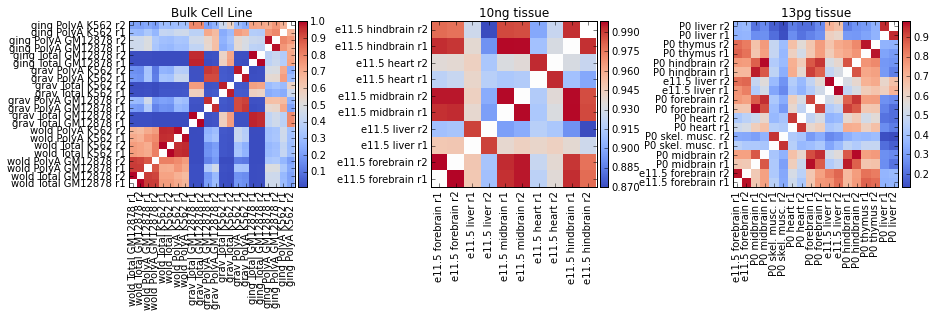

In [47]:
plot_correlations([bulk_cell_line_scores, tissue_10ng_scores, tissue_13pg_scores],
                  [bulk_cell_line_labels, tissue_10ng_labels, tissue_13pg_labels],
                  ['Bulk Cell Line', '10ng tissue', '13pg tissue'],
                  'Naïve Pearson')

## Naive Spearman Comparison

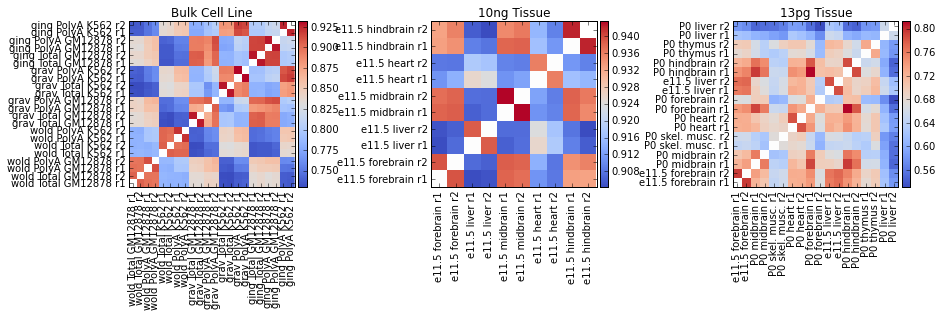

In [48]:
plot_correlations([bulk_cell_line_scores, tissue_10ng_scores, tissue_13pg_scores],
                  [bulk_cell_line_labels, tissue_10ng_labels, tissue_13pg_labels],
                  ['Bulk Cell Line', '10ng Tissue', '13pg Tissue'],
                  'Naïve Spearman')

# Rafa's Comparisons

Rafa's scoring metrics use two filters. Drop all the zeros and then drop everything whose average log2 is < 0.

## Rafa Pearson Comparison

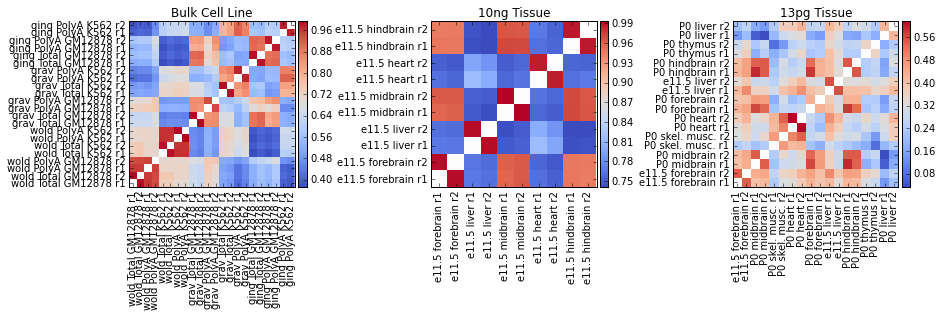

In [49]:
plot_correlations([bulk_cell_line_scores, tissue_10ng_scores, tissue_13pg_scores],
                  [bulk_cell_line_labels, tissue_10ng_labels, tissue_13pg_labels],
                  ['Bulk Cell Line', '10ng Tissue', '13pg Tissue'],
                  'Rafa Pearson')

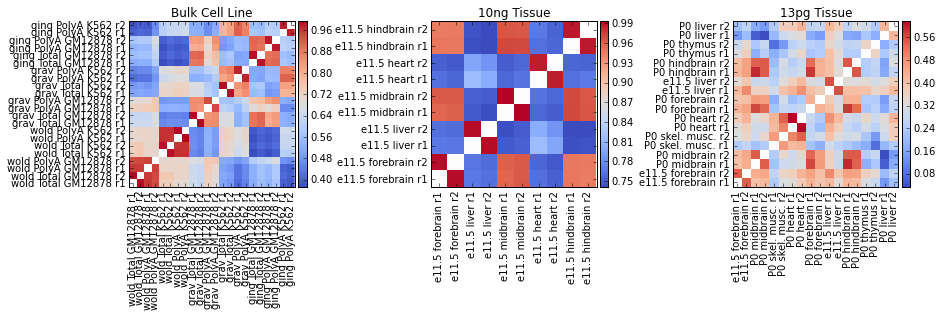

In [50]:
plot_correlations([bulk_cell_line_scores, tissue_10ng_scores, tissue_13pg_scores],
                  [bulk_cell_line_labels, tissue_10ng_labels, tissue_13pg_labels],
                  ['Bulk Cell Line', '10ng Tissue', '13pg Tissue'],
                  'Rafa Pearson')

## Rafa Spearman Comparison

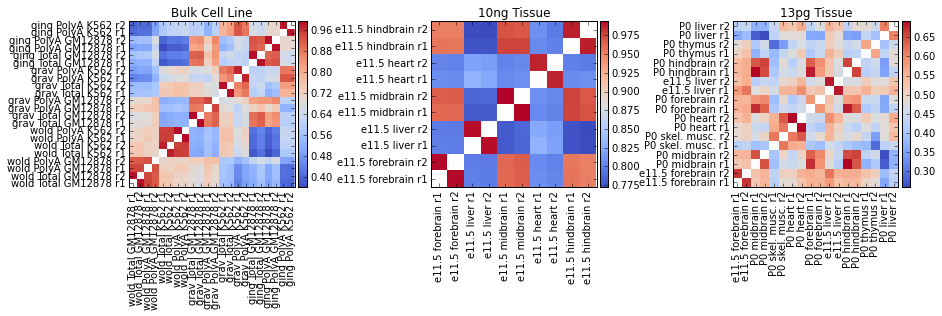

In [51]:
plot_correlations([bulk_cell_line_scores, tissue_10ng_scores, tissue_13pg_scores],
                  [bulk_cell_line_labels, tissue_10ng_labels, tissue_13pg_labels],
                  ['Bulk Cell Line', '10ng Tissue', '13pg Tissue'],
                  'Rafa Spearman')

# Rafa MAD Comparison

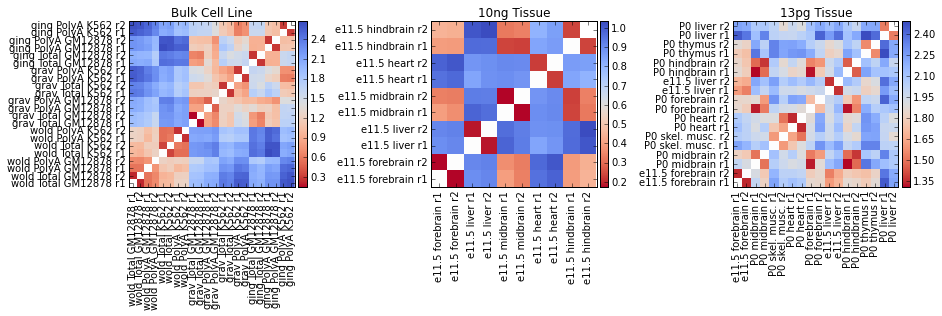

In [52]:
plot_correlations([bulk_cell_line_scores, tissue_10ng_scores, tissue_13pg_scores],
                  [bulk_cell_line_labels, tissue_10ng_labels, tissue_13pg_labels],
                  ['Bulk Cell Line', '10ng Tissue', '13pg Tissue'],
                  'MAD')

## Rafa SD Comparison

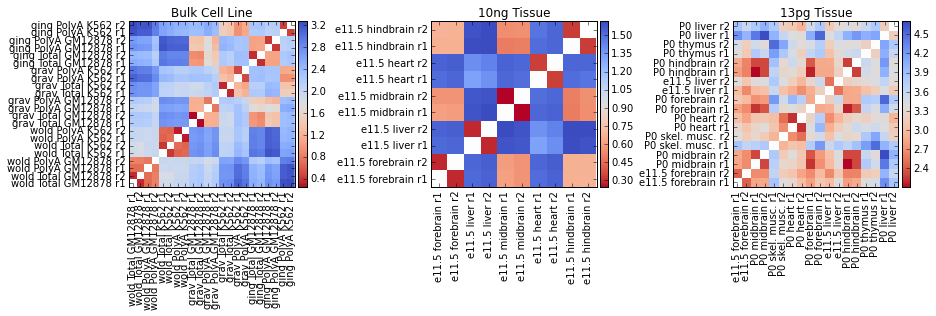

In [53]:
plot_correlations([bulk_cell_line_scores, tissue_10ng_scores, tissue_13pg_scores],
                  [bulk_cell_line_labels, tissue_10ng_labels, tissue_13pg_labels],
                  ['Bulk Cell Line', '10ng Tissue', '13pg Tissue'],
                  'SD')

# Scores by experiment set

## All 13 pg scores

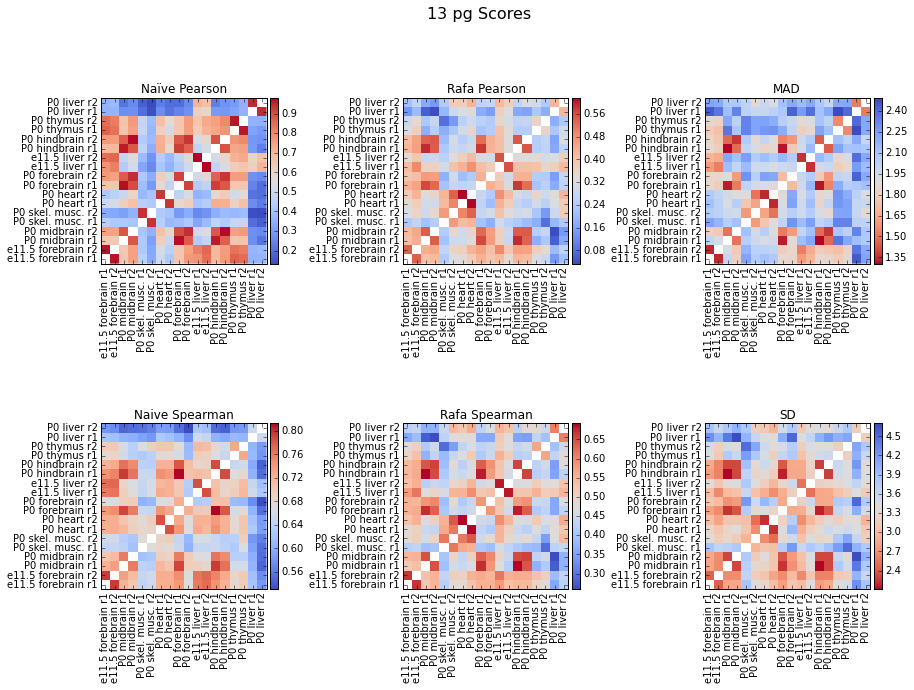

In [54]:
plot_all_scores_for_experiment_set(tissue_13pg_scores, '13 pg Scores', labels=tissue_13pg_labels)

## All 10 ng scores

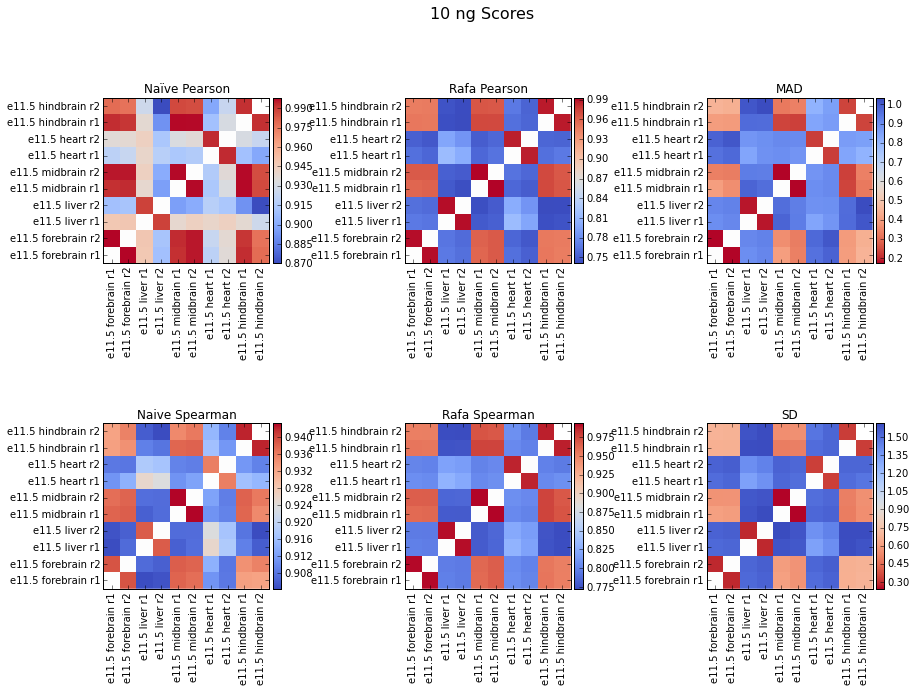

In [55]:
plot_all_scores_for_experiment_set(tissue_10ng_scores, '10 ng Scores', labels=tissue_10ng_labels)

# Fractions Passed Filters

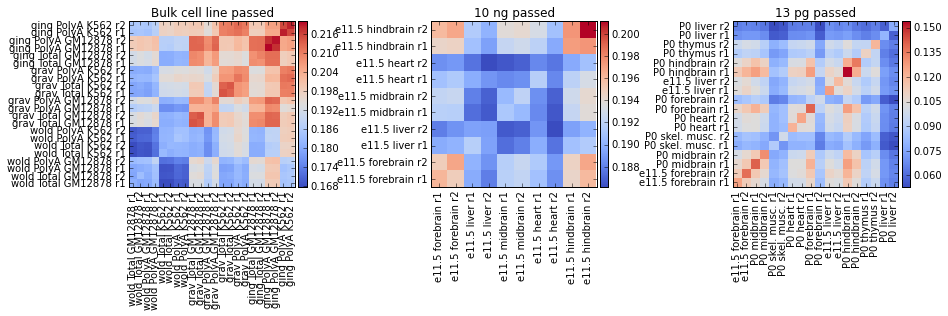

In [56]:
fig, ax = pyplot.subplots(1, 3, figsize=(14,10))
pyplot.subplots_adjust(wspace=.7, hspace=.3)
cax = heatmap(ax[0], bulk_cell_line_scores['passed filter'] / bulk_cell_line_scores['total rows'],
              title='Bulk cell line passed', labels=bulk_cell_line_labels, )
cax = heatmap(ax[1], tissue_10ng_scores['passed filter'] / tissue_10ng_scores['total rows'], 
              title='10 ng passed', labels=tissue_10ng_labels)
cax = heatmap(ax[2], tissue_13pg_scores['passed filter'] / tissue_13pg_scores['total rows'], 
              title='13 pg passed', labels=tissue_13pg_labels)

fig.savefig('/tmp/cell-line_v_13pg_pass_filter.png')
fig.savefig('/tmp/cell-line_v_13pg_pass_filter.svg')

# Replicate vs Replicate Scatter Plots

I was only able to find two comparable datasets between the 10ng and 13 pg datasets, e11.5 forebrain and e11.5 liver.

## Compare 10 ng e11.5 forebrain to 13 pg e11.5 forebrain

Simple log2 scatterplot with the spike ins highlighted. points with a zero wont be plotted.

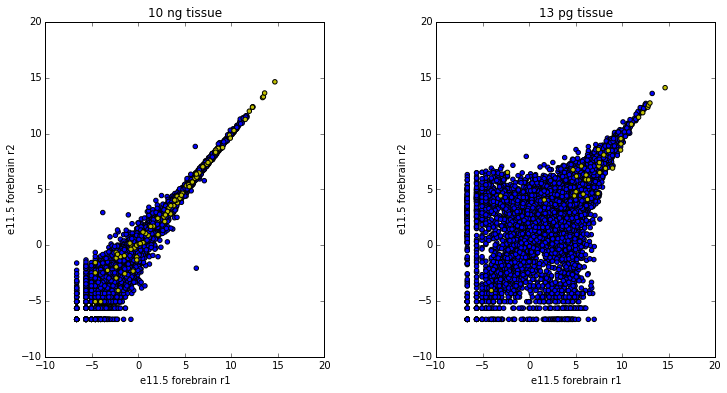

In [57]:
f = plot_replicate_comparison(
    numpy.log2(tissue_10ng_fpkms),'ENCLB835LVO', 'ENCLB471QMM', '10 ng tissue', tissue_10ng_labels,
    numpy.log2(tissue_13pg_fpkms), 'ENCLB917PKP', 'ENCLB026BHP', '13 pg tissue', tissue_13pg_labels)

## Compare 10 ng e11.5 liver to 13 pg e11.5 liver

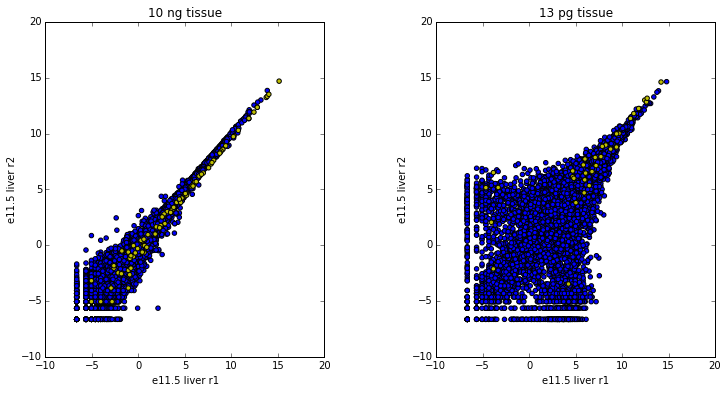

In [58]:
f = plot_replicate_comparison(
    numpy.log2(tissue_10ng_fpkms),'ENCLB055KYV', 'ENCLB357KYA', '10 ng tissue', tissue_10ng_labels,
    numpy.log2(tissue_13pg_fpkms), 'ENCLB449LBZ', 'ENCLB905LVV', '13 pg tissue', tissue_13pg_labels)

# How many genes are detected

How can we tell what fraction of genes are present between the two comparable tissues?

In [59]:
def detected_genes(fpkms, rep1, rep2, Acutoff = 0):
    rep1series = fpkms[rep1]
    rep2series = fpkms[rep2]
    
    nozero = (rep1series != 0) & (rep2series != 0)
    return ((rep1series + rep2series) / 2.0)[nozero]
    
    replz1 = numpy.log2(rep1series[nozero])
    replz2 = numpy.log2(rep2series[nozero])
    
    # M = replz1 - replz2
    A = (replz1 + replz2) / 2.0

    return A[nozero] 
    #return A[A > Acutoff]   # (Rafa's extra threshold)

In [60]:
#bulk_genes = detected_genes(bulk_fpkms, 'ENCLB045ZZZ', 'ENCLB046ZZZ')
tissue_10ng_e11_forebrain_genes = detected_genes(tissue_10ng_fpkms, 'ENCLB835LVO', 'ENCLB471QMM')
tissue_10ng_e11_liver_genes = detected_genes(tissue_10ng_fpkms, 'ENCLB055KYV', 'ENCLB357KYA')

tissue_13pg_e11_forebrain_genes = detected_genes(tissue_13pg_fpkms, 'ENCLB917PKP', 'ENCLB026BHP')
tissue_13pg_e11_liver_genes = detected_genes(tissue_13pg_fpkms, 'ENCLB449LBZ', 'ENCLB905LVV')

In [96]:
def plot_detected_genes_venn(left_genes, right_genes, set_names, plot_titles):
    
    fig, ax = pyplot.subplots(1,len(left_genes), figsize=(12,8))
    for i, (left, right, names, title) in enumerate(zip(left_genes, right_genes, set_names, plot_titles)):
        left_set = set(left.index)
        right_set = set(right.index)
        ax[i].set_title(title)
        venn2([left_set, right_set], names, ax=ax[i])


## Plot 10ng vs 13pg detected gene sets

Compare genes detected between 10 ng and 13 pg forebrain and liver tissues.

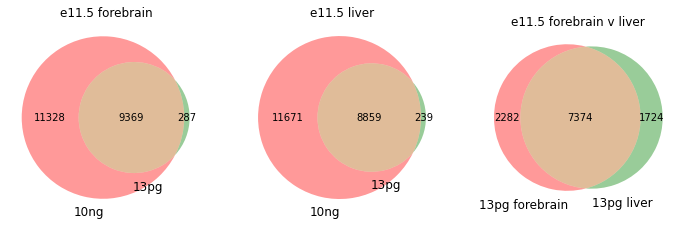

In [97]:
plot_detected_genes_venn(
    [tissue_10ng_e11_forebrain_genes, tissue_10ng_e11_liver_genes, tissue_13pg_e11_forebrain_genes], 
    [tissue_13pg_e11_forebrain_genes, tissue_13pg_e11_liver_genes, tissue_13pg_e11_liver_genes],
    [('10ng', '13pg'), ('10ng', '13pg'), ('13pg forebrain', '13pg liver')],
    ['e11.5 forebrain', 'e11.5 liver', 'e11.5 forebrain v liver'])
    

What might be in those 13 pg only sets?

In [255]:
genes_only_in_13pg_forebrain = set(tissue_13pg_e11_forebrain_genes.index).difference(set(tissue_10ng_e11_forebrain_genes.index))
genes_only_in_13pg_liver = set(tissue_13pg_e11_liver_genes.index).difference(set(tissue_10ng_e11_liver_genes.index))

In [277]:
def list_gene_names_from_filtered_set(all_genes, gene_set, gene_map, cutoff=1):
    return pandas.DataFrame(
        sorted(
            [(gene_id, gene_map[gene_id], fpkm) for gene_id, fpkm in all_genes[gene_set].items() if fpkm > cutoff],
            key=lambda x: x[2]),
        columns=['gene id', 'gene name', 'fpkm']
    )

## Genes only in 13 pg forebrain with fpkm > 1

I filtered the list of genes to those above a fpkm of 1 to avoid having too long of a list to display easily.

In [279]:
list_gene_names_from_filtered_set(tissue_13pg_e11_forebrain_genes, genes_only_in_13pg_forebrain, m4_gene_map)       

,gene id,gene name,fpkm
0,ENSMUSG00000093203.1,Gm22411,1.050
1,ENSMUSG00000082926.3,Gm8172,1.095
2,ENSMUSG00000054932.3,Afp,1.245
3,ENSMUSG00000080932.3,Gm10224,1.255
4,ENSMUSG00000083813.1,Gm15502,1.275
5,ENSMUSG00000097698.1,Gm26906,1.275
6,ENSMUSG00000084333.1,Gm11599,1.280
7,ENSMUSG00000081228.1,Gm16089,1.330
8,ENSMUSG00000061330.7,Gm11361,1.540
9,ENSMUSG00000025201.7,Bloc1s2-ps,1.545


## Genes only in 13 pg liver with fpkm > 1

In [280]:
list_gene_names_from_filtered_set(tissue_13pg_e11_liver_genes, genes_only_in_13pg_liver, m4_gene_map)       

,gene id,gene name,fpkm
0,ENSMUSG00000081700.1,Gm14337,1.025
1,ENSMUSG00000081228.1,Gm16089,1.030
2,ENSMUSG00000066807.1,Gm10179,1.030
3,ENSMUSG00000071568.4,Gm5874,1.090
4,ENSMUSG00000062582.5,Rpl30-ps8,1.110
5,ENSMUSG00000078636.3,Gm7336,1.190
6,ENSMUSG00000080186.2,Gm14448,1.265
7,ENSMUSG00000057499.3,Gm6177,1.295
8,ENSMUSG00000090467.2,Gm4613,1.365
9,ENSMUSG00000055795.5,Gm5160,1.445


## Sliding window reporting fraction of genes detected by fpkm

I was trying to think of how to guess what the limits of detection are, so this is an attempt to compute
the fraction of NaNs (triggered by having a zero fpkm in either column) on the arrays sorted by the max
expression between the two replicates.

The x tick labels are a little tricky. For all but the last ones they're the expression level for the gene at that position. e.g. gene 5000 might have an expression level of .5. The last tickmark is the maximum value in the 
expression value list.

In [64]:
def fraction_not_nan(experiment_list, experiment_names):
    genes = pandas.DataFrame(experiment_list, index=experiment_names).T
    sorted_genes = sorted(zip(genes.fillna(0).values, genes.index), key=lambda x: max(x[0]))
    gene_ids = [row[1] for row in sorted_genes]

    f, ax = pyplot.subplots(1,1, figsize=(12,8))
    for exp, name in zip(experiment_list, experiment_names):
        ax.plot(pandas.rolling_count(exp[gene_ids], window=100)/100.0, label=name)
    ax.set_ylim((0,1.10))
    ax.set_ylabel('fraction of != 0 in either replicate')

    ax.set_xlabel('genes sorted by maximum average fpkm expression')
    expression_levels = [max(row[0]) for row in sorted_genes]
    xticklabels = []
    myticks = numpy.arange(0, ax.get_xticks()[-1], 2500)
    for xtick in myticks:
        xtick = int(xtick)
        xticklabels.append(expression_levels[xtick] if xtick < len(expression_levels) else expression_levels[-1])
    ax.set_xticks(myticks)
    ax.set_xticklabels(xticklabels)
    ax.legend(loc='best')
    
    return f

## e11.5 forebrain fraction non-null observations

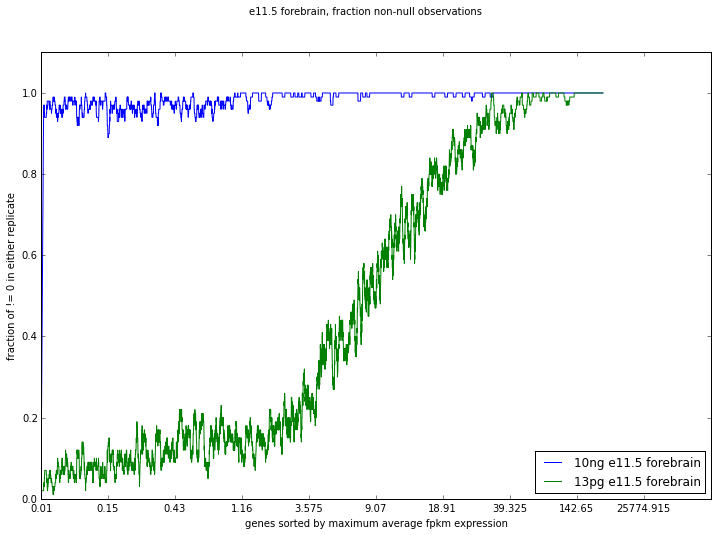

In [65]:
f = fraction_not_nan([tissue_10ng_e11_forebrain_genes, tissue_13pg_e11_forebrain_genes], 
                     ['10ng e11.5 forebrain', '13pg e11.5 forebrain'])
f.suptitle('e11.5 forebrain, fraction non-null observations')
f.savefig('/tmp/fraction_e11_forebrain_observed.png')
f.savefig('/tmp/fraction_e11_forebrain_observed.svg')

## e11.5 liver fraction non-null observations

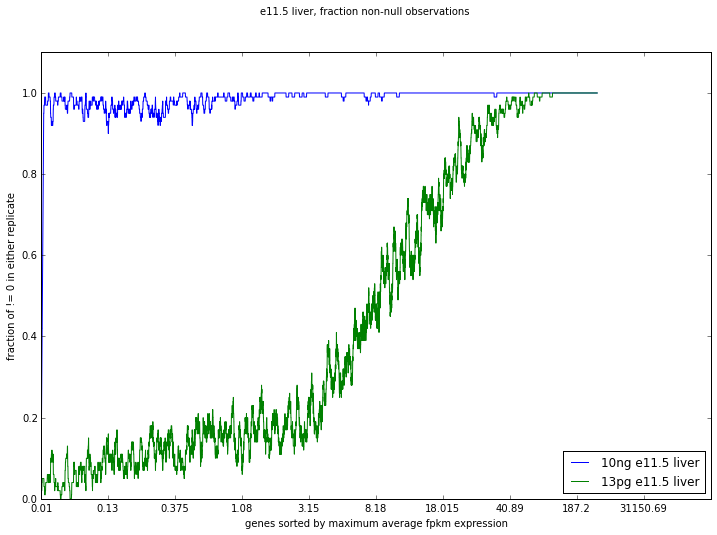

In [66]:
f = fraction_not_nan([tissue_10ng_e11_liver_genes, tissue_13pg_e11_liver_genes], 
                     ['10ng e11.5 liver', '13pg e11.5 liver'])
f.suptitle('e11.5 liver, fraction non-null observations')
f.savefig('/tmp/fraction_e11_liver_observed.png')
f.savefig('/tmp/fraction_e11_liver_observed.svg')

# Sweep over Acutoff values

How does the correlation change as we increase Acutoff

In [67]:
def stable(fpkms, rep1_name, rep2_name, labels):
    rep1 = fpkms[rep1_name]
    rep2 = fpkms[rep2_name]
    
    eitherzero = (rep1 == 0) | (rep2 == 0)
    replz1 = numpy.log2(rep1[eitherzero != True])
    replz2 = numpy.log2(rep2[eitherzero != True])
    
    M = replz1 - replz2
    A = (replz1 + replz2) / 2.0

    print('{} v {}'.format(labels.get(rep1_name, rep1_name), labels.get(rep2_name, rep2_name)))
    print('Total genes:', len(rep1.index))
    print('Detectable (both replicates non-zero):', len(replz1.index))
    
    results = []
    cutoffs = numpy.arange(11, dtype=int)
    for Acutoff in cutoffs:
        passed_filter = replz1[A > Acutoff]
        row = {}
        row['Acutoff'] = Acutoff
        row['pass cutoff'] = len(passed_filter)
        row['Pearson'] = scipy.stats.pearsonr(replz1[A > Acutoff], replz2[A > Acutoff])[0]
        row['Spearman'] = scipy.stats.spearmanr(replz1[A > Acutoff], replz2[A > Acutoff])[0]
        row['mad'] = numpy.round(numpy.median(numpy.abs(M)[A > Acutoff]) * 1.4826, 3)
        row['sd'] = numpy.round(numpy.sqrt(numpy.mean(M[A > Acutoff] ** 2)), 3)
        row['fraction spikes'] = len([ x for x in passed_filter.index if x.startswith('gSpike') ]) / len(passed_filter)
        results.append(row)
    return pandas.DataFrame(results, index=cutoffs)
        


## e11.5 liver correlation Acutoff sweep

In [149]:
acutoff_e11_liver = stable(tissue_13pg_fpkms, 'ENCLB449LBZ', 'ENCLB905LVV', labels=tissue_13pg_labels)
acutoff_e11_liver

e11.5 liver r1 v e11.5 liver r2
Total genes: 69690
Detectable (both replicates non-zero): 9098


,Acutoff,Pearson,Spearman,fraction spikes,mad,pass cutoff,sd
0,0,0.557837,0.683440,0.004284,1.363,7237,2.535
1,1,0.645828,0.699518,0.004217,1.270,6640,1.977
2,2,0.703040,0.701289,0.004436,1.181,6086,1.632
3,3,0.738588,0.688262,0.005087,1.071,5308,1.377
4,4,0.771877,0.674803,0.006240,0.958,4327,1.166
5,5,0.798249,0.672866,0.008500,0.871,3059,0.999
6,6,0.841773,0.706509,0.010753,0.698,1860,0.811
7,7,0.883959,0.777721,0.015564,0.570,1028,0.642
8,8,0.921106,0.851711,0.024164,0.420,538,0.472
9,9,0.939338,0.874983,0.035587,0.363,281,0.371


## e11.5 forebrain correlation Acutoff sweep

In [150]:
acutoff_e11_forebrain = stable(tissue_13pg_fpkms, 'ENCLB917PKP', 'ENCLB026BHP', labels=tissue_13pg_labels)
acutoff_e11_forebrain

e11.5 forebrain r1 v e11.5 forebrain r2
Total genes: 69690
Detectable (both replicates non-zero): 9656


,Acutoff,Pearson,Spearman,fraction spikes,mad,pass cutoff,sd
0,0,0.542825,0.668632,0.004057,1.344,7888,2.453
1,1,0.613162,0.678433,0.004226,1.257,7335,1.996
2,2,0.689709,0.684020,0.004634,1.160,6689,1.582
3,3,0.724843,0.668487,0.004955,1.077,5853,1.339
4,4,0.755383,0.647261,0.006161,0.974,4707,1.139
5,5,0.781754,0.654375,0.008517,0.829,3170,0.979
6,6,0.833791,0.706287,0.011963,0.652,1839,0.775
7,7,0.878839,0.765261,0.018182,0.515,990,0.605
8,8,0.916934,0.832327,0.026585,0.398,489,0.454
9,9,0.929421,0.830107,0.043478,0.356,230,0.373


## P0 heart correlation Acutoff sweep

In [151]:
acutoff_p0_forebrain = stable(tissue_13pg_fpkms, 'ENCLB652HKH', 'ENCLB348BMH', labels=tissue_13pg_labels)
acutoff_p0_forebrain

P0 heart r1 v P0 heart r2
Total genes: 69690
Detectable (both replicates non-zero): 9209


,Acutoff,Pearson,Spearman,fraction spikes,mad,pass cutoff,sd
0,0,0.616631,0.691520,0.003840,1.343,7291,2.225
1,1,0.697177,0.700241,0.004169,1.247,6716,1.755
2,2,0.739077,0.689392,0.004443,1.166,6077,1.478
3,3,0.775030,0.671793,0.004993,1.073,5207,1.253
4,4,0.796384,0.659135,0.006323,1.002,3954,1.110
5,5,0.829451,0.695983,0.008310,0.869,2527,0.956
6,6,0.865667,0.739689,0.011604,0.774,1465,0.798
7,7,0.876718,0.774469,0.014851,0.724,808,0.716
8,8,0.883917,0.791867,0.018391,0.658,435,0.642
9,9,0.870352,0.788517,0.029787,0.599,235,0.622


## Mismatched replicate correlation Acutoff sweep

In [152]:
acutoff_mismatched = stable(tissue_13pg_fpkms, 'ENCLB652HKH', 'ENCLB026BHP', labels=tissue_13pg_labels)
acutoff_mismatched

P0 heart r1 v e11.5 forebrain r2
Total genes: 69690
Detectable (both replicates non-zero): 9043


,Acutoff,Pearson,Spearman,fraction spikes,mad,pass cutoff,sd
0,0,0.374546,0.506341,0.004168,2.033,7198,3.085
1,1,0.447431,0.522676,0.004537,1.915,6612,2.540
2,2,0.501805,0.520326,0.005021,1.783,5975,2.153
3,3,0.533030,0.490147,0.005838,1.671,5139,1.892
4,4,0.532620,0.436217,0.006988,1.595,4007,1.742
5,5,0.495570,0.389922,0.010097,1.572,2575,1.694
6,6,0.481838,0.379808,0.013889,1.561,1440,1.612
7,7,0.425082,0.349540,0.019455,1.543,771,1.574
8,8,0.323645,0.233962,0.028133,1.476,391,1.543
9,9,0.216771,0.018223,0.038835,1.481,206,1.526


Using the fraction data present plot and the earlier scatter plots I estimated that somewhere between an Acutoff of 5 to 6 would give a reasonable correlation. (An average of 32 - 64 fpkm).

### function to plot interesting scores for Acutoff sweep

In [240]:
def plot_scores_by_acutoff(scores, names):
    fig, ax = pyplot.subplots(2, 2, figsize=(10, 10))

    titles = [['Genes passed cutoff', 'MAD'],
              ['Spearman', 'Pearson']]
    attributes = [['pass cutoff', 'mad'],
                  ['Spearman', 'Pearson']]

    for i in range(2):
        for j in range(2):
            for acut, name in zip(scores, names):
                ax[i][j].plot(acut[attributes[i][j]], label=name)
            ax[i][j].set_title(titles[i][j])
            ax[i][j].legend(loc=0)
            ax[i][j].set_xlabel('Acutoff')
    return fig

## Plot scores by Acutoff 

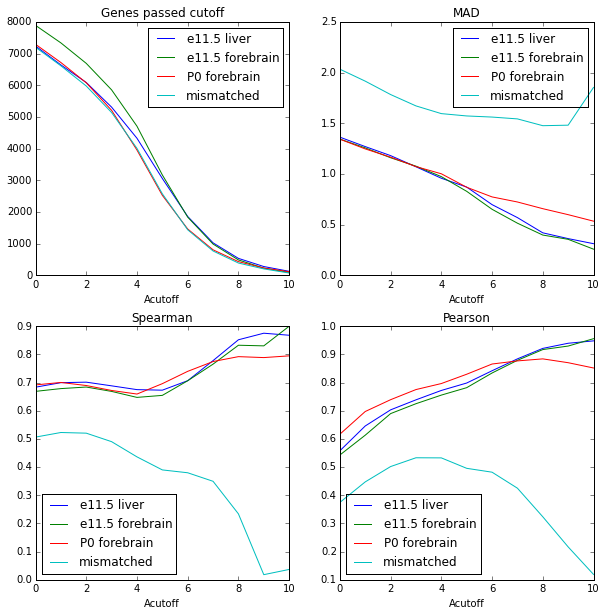

In [241]:
fig = plot_scores_by_acutoff([acutoff_e11_liver, acutoff_e11_forebrain, acutoff_p0_forebrain, acutoff_mismatched],
                             ['e11.5 liver', 'e11.5 forebrain', 'P0 forebrain', 'mismatched'])


# Filtered correlation score heatmaps

In [127]:
def plot_filtered_scores_for_experiment_set(scores, title, labels=None, vmin=None, vmax=None):
    fig, ax = pyplot.subplots(2, 3, figsize=(14, 10))
    fig.suptitle(title, fontsize=16)
    pyplot.subplots_adjust(wspace=.7, hspace=.4)

    cax = heatmap(ax[0][0], scores['Rafa Pearson'][scores['Rafa Pearson'] < 1.0], 
                  title='Rafa Pearson', labels=labels, vmin=vmin, vmax=vmax)
    cax = heatmap(ax[1][0], scores['Rafa Spearman'][scores['Rafa Spearman'] < 1.0], 
                  title='Rafa Spearman', labels=labels, vmin=vmin, vmax=vmax)

    cax = heatmap(ax[0][1], scores['MAD'][scores['MAD'] > 0], 
                  title='MAD', labels=labels, vmin=vmin, vmax=vmax, cmap="coolwarm_r")
    cax = heatmap(ax[1][1], scores['SD'][scores['SD'] > 0], 
                  title='SD', labels=labels, vmin=vmin, vmax=vmax, cmap="coolwarm_r")
    
    cax = heatmap(ax[0][2], scores['passed filter'] / scores['total rows'],
              title='Fraction passed filter', labels=labels )

    ax[1][2].set_visible(False)
    return fig

In [128]:
def plot_all_filtered_correlations_for_cutoff(fpkms, Acutoff, experiment_name, labels):
    scores = compute_all_vs_all_scores(fpkms, Acutoff=Acutoff)
    fig = plot_filtered_scores_for_experiment_set(
        scores, 'Acutoff>{} {} Scores'.format(Acutoff, experiment_name), labels=labels)
    figname = 'Acutoff_gt_{}_for_{}_scores'.format(Acutoff, experiment_name.lower())
    figname = figname.replace(' ', '-')
    fig.savefig('/tmp/'+figname+'.png')
    fig.savefig('/tmp/'+figname+'.svg')

In [238]:
def plot_score_by_cutoff(fpkms, labels):
    Acutoffs = [5,6,7,8]
    score_names = ['Rafa Pearson', 'Rafa Spearman', 'MAD', 'SD', 'passed filter']
    scores = []
    for Acutoff in Acutoffs:
        scores.append(compute_all_vs_all_scores(fpkms, Acutoff))
        
    fig, ax = pyplot.subplots(len(score_names), len(scores), 
                              figsize=(6 * len(scores), 4 * len(score_names)))
    for row, score_name in enumerate(score_names):
        for col, (Acutoff, score) in enumerate(zip(Acutoffs, scores)):
            if score_name == 'passed filter':
                corr = score['passed filter'] / score['total rows']
                colormap='coolwarm'
                vmin = None
                vmax = None
            elif score_name in ('MAD', 'SD'):
                corr = score[score_name][score[score_name] > 0]
                colormap='coolwarm_r'
                vmin = .5
                vmax = 2
            else:
                corr = score[score_name][score[score_name] < 1]
                colormap='coolwarm'
                vmin = .3
                vmax = .9
            
            cax = heatmap(ax[row][col], corr, labels=labels, cmap=colormap, vmin=vmin, vmax=vmax)
            
            if col == 0:
                ax[row][col].set_ylabel(score_name)
            elif col != 0:
                ax[row][col].set_yticklabels([])
                
            if row == 0:
                ax[row][col].set_title('Acutoff > {}'.format(Acutoff))
            if row != len(score_names) - 1:
                ax[row][col].set_xticklabels([])
            else:
                ax[row][col].set_xlabel('Acutoff > {}'.format(Acutoff))

    return fig, ax

## Plot score by cutoff

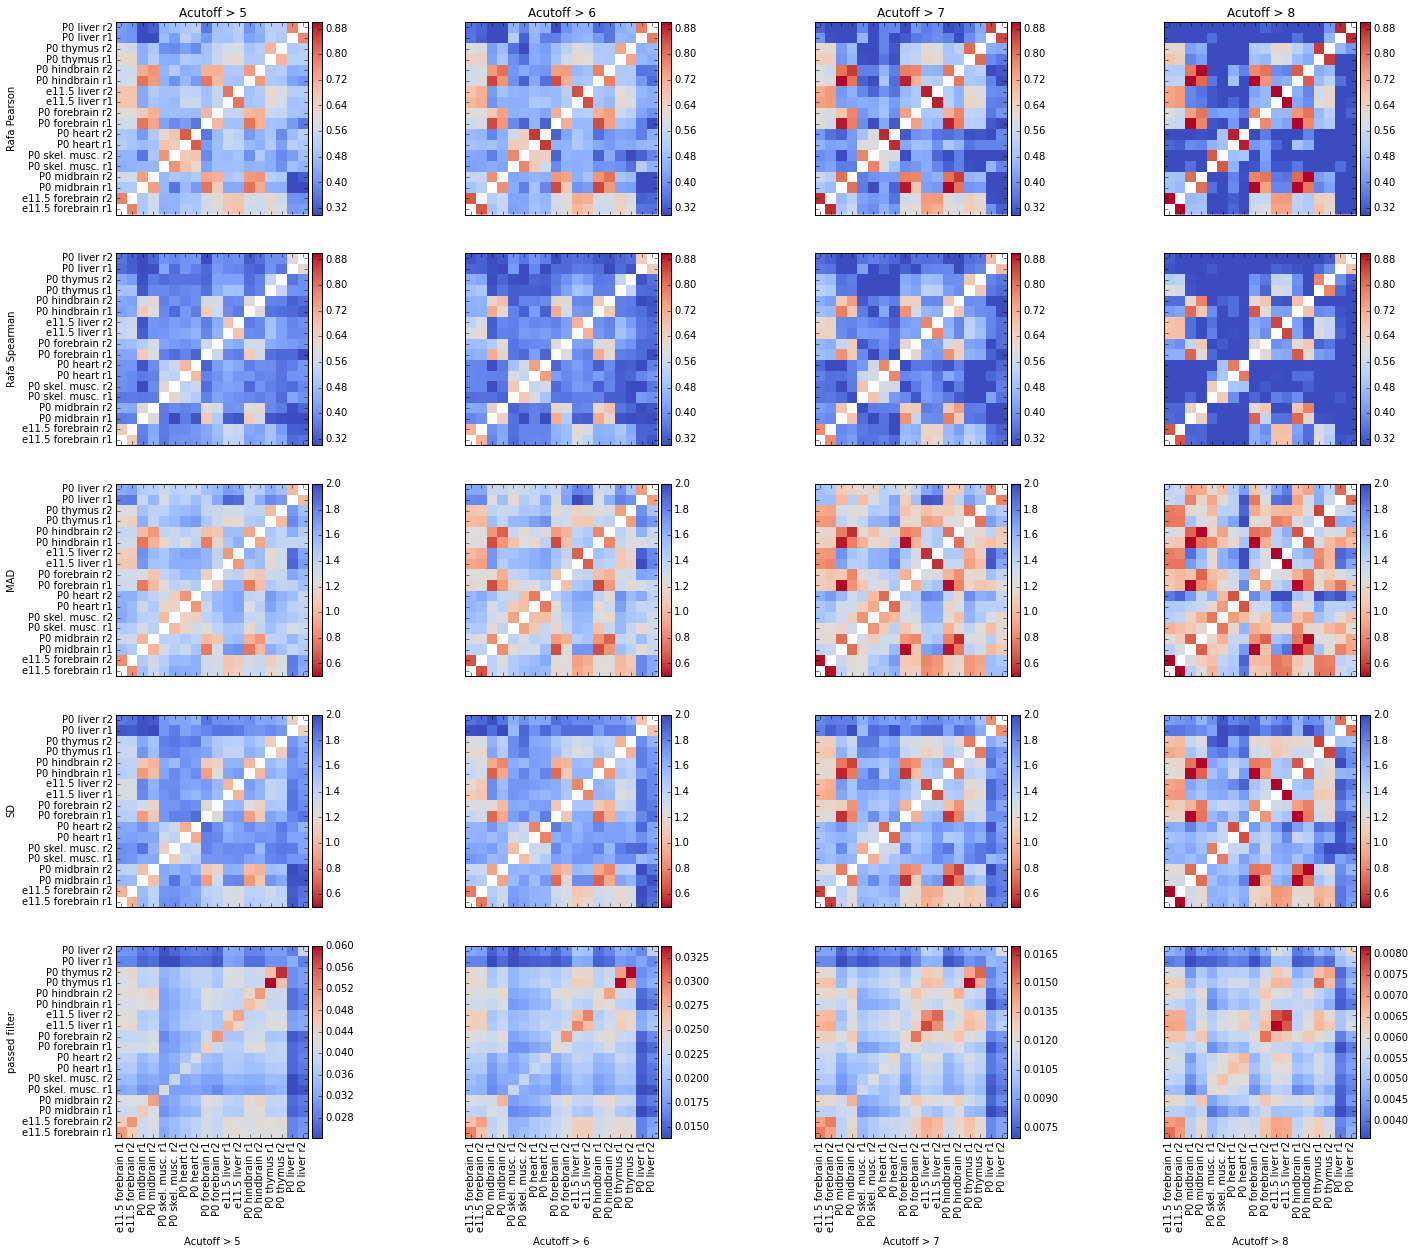

In [239]:
 fig, ax = plot_score_by_cutoff(tissue_13pg_fpkms, tissue_13pg_labels)

In [233]:
fig.savefig('/tmp/score_by_acutoff.png')
fig.savefig('/tmp/score_by_acutoff.svg')

## 13 pg correlation scores for Acutoff > 5

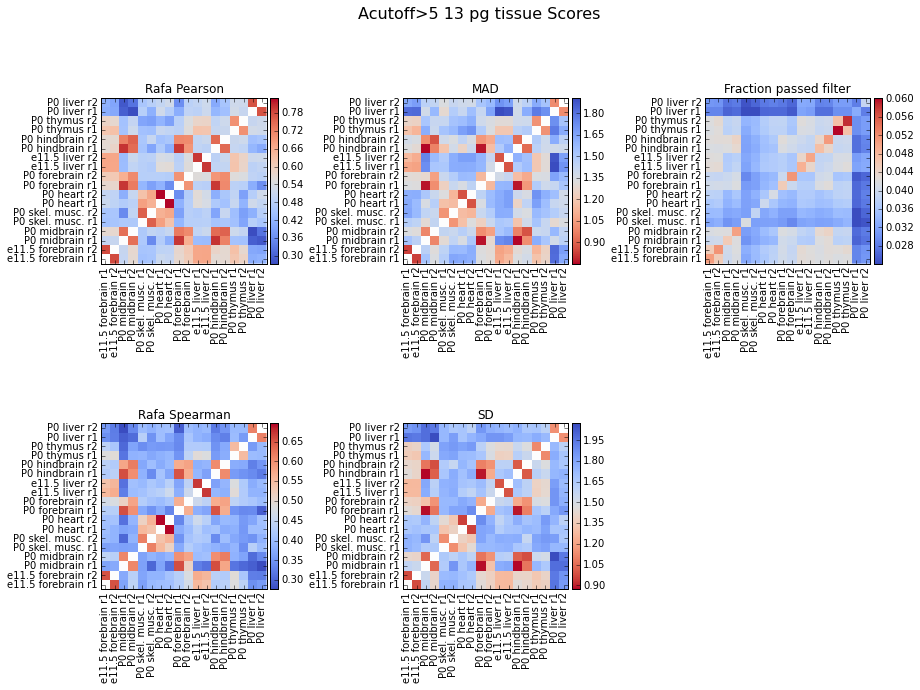

In [129]:
plot_all_filtered_correlations_for_cutoff(tissue_13pg_fpkms, 5, '13 pg tissue', labels=tissue_13pg_labels)

## 13 pg correlation scores for Acutoff > 6

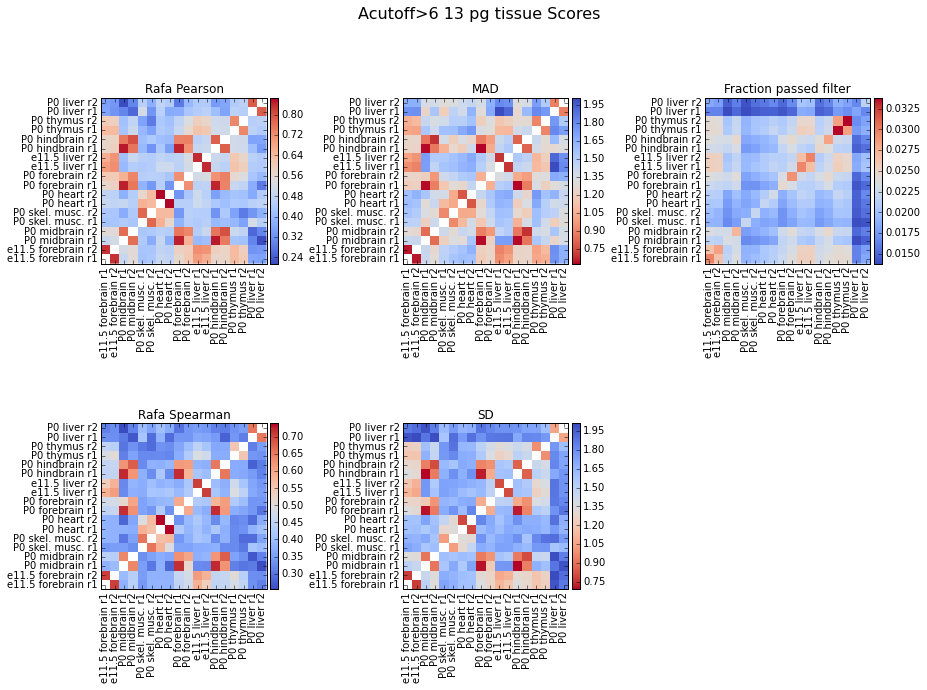

In [130]:
plot_all_filtered_correlations_for_cutoff(tissue_13pg_fpkms, 6, '13 pg tissue', labels=tissue_13pg_labels)

## 13 pg correlation scores for Acutoff > 7

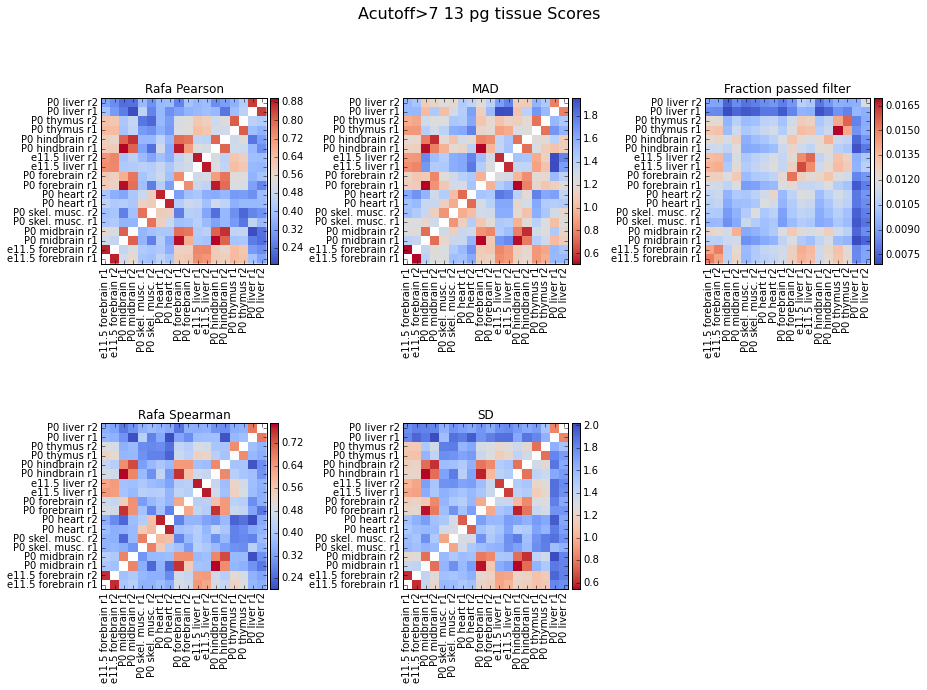

In [131]:
plot_all_filtered_correlations_for_cutoff(tissue_13pg_fpkms, 7, '13 pg tissue', labels=tissue_13pg_labels)

## 13 pg correlation scores for Acutoff > 8

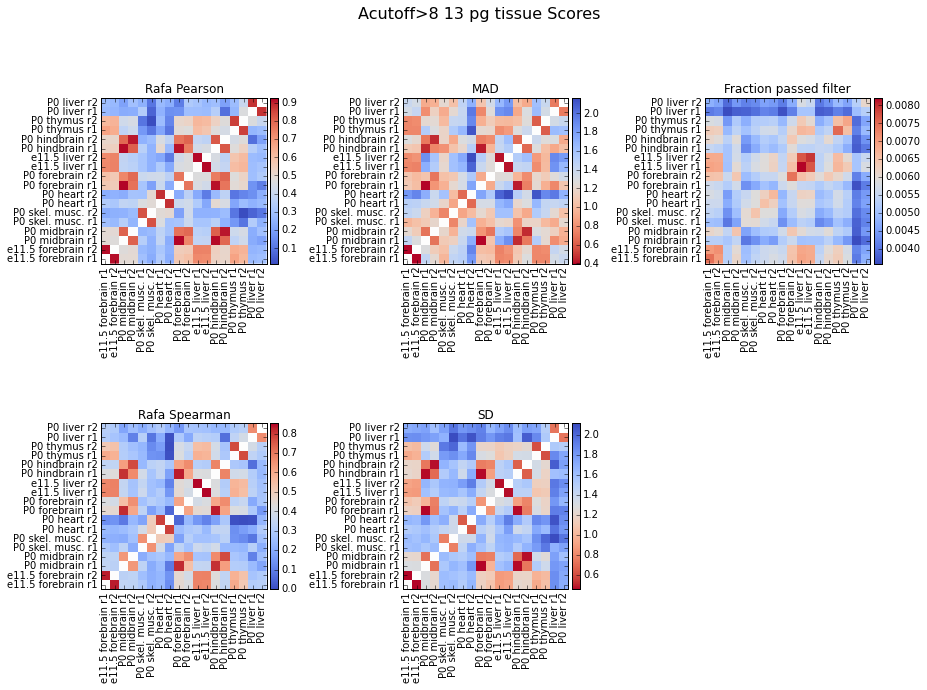

In [132]:
plot_all_filtered_correlations_for_cutoff(tissue_13pg_fpkms, 8, '13 pg tissue', labels=tissue_13pg_labels)

## Scatter plots of matched replicates filtered by Acutoff > 6

<a href="#Compare-10-ng-e11.5-forebrain-to-13-pg-e11.5-forebrain">Link to e11.5 forebrain Acutoff > 0 scatter plot</a>

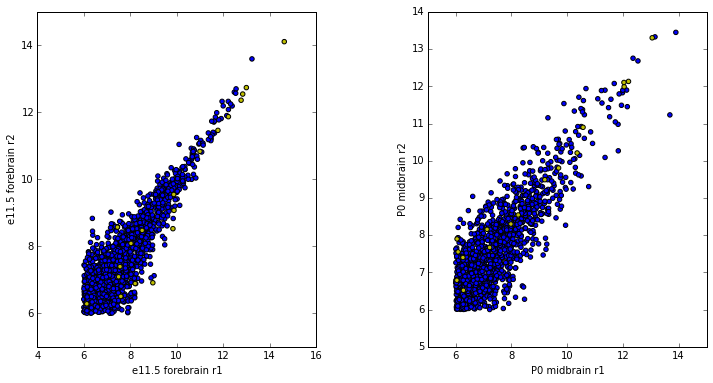

In [133]:
f = plot_replicate_comparison(
    numpy.log2(tissue_13pg_fpkms[tissue_13pg_fpkms > 2**6]), 'ENCLB917PKP', 'ENCLB026BHP', '', tissue_13pg_labels,
    numpy.log2(tissue_13pg_fpkms[tissue_13pg_fpkms > 2**6]), 'ENCLB719BQO', 'ENCLB669AEL', '', tissue_13pg_labels)

<a href="#Compare-10-ng-e11.5-liver-to-13-pg-e11.5-liver">Link to e11.5 liver Acutoff > 0 scatter plot</a>

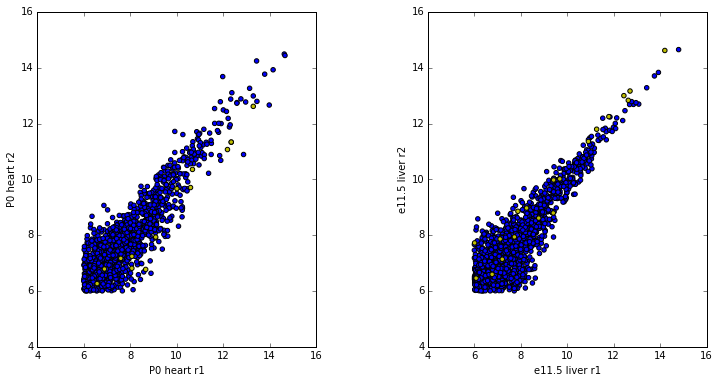

In [134]:
f = plot_replicate_comparison(
    numpy.log2(tissue_13pg_fpkms[tissue_13pg_fpkms > 2**6]), 'ENCLB652HKH', 'ENCLB348BMH', '', tissue_13pg_labels,
    numpy.log2(tissue_13pg_fpkms[tissue_13pg_fpkms > 2**6]), 'ENCLB449LBZ', 'ENCLB905LVV', '', tissue_13pg_labels)

## Scatter plots of mismatched replicates filtered by Acutoff > 6

We want to make sure that mismatched replicates actually score poorly.

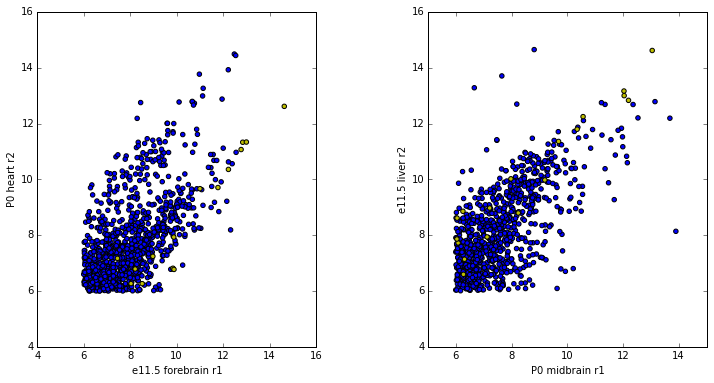

In [135]:
f = plot_replicate_comparison(
    numpy.log2(tissue_13pg_fpkms[tissue_13pg_fpkms > 2**6]), 'ENCLB917PKP', 'ENCLB348BMH', '', tissue_13pg_labels,
    numpy.log2(tissue_13pg_fpkms[tissue_13pg_fpkms > 2**6]), 'ENCLB719BQO', 'ENCLB905LVV', '', tissue_13pg_labels)

# Hierarchical Clustering by Score

One question we had was if if replicates sorted closer to each other when using a hierarchical clustering metric.

For this I used the SciPy <a href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage">linkage</a> function using single linkage and euclidean distance and the correlation scores we computed earlier as the input distance metric. The plots are then created with the SciPy <a href="http://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html#scipy.cluster.hierarchy.dendrogram">dendrogram</a> function.

In [98]:
from scipy.cluster import hierarchy

In [234]:
def plot_dendogram_for_distances(experiment_set, labels, experiment_name):
    scores = ['Naïve Pearson', 'Naïve Spearman', 'Rafa Pearson', 'Rafa Spearman', 'MAD', 'SD']
    fig, ax = pyplot.subplots(len(scores), 1, figsize=(6, 1.5 * len(labels) ))
    for i, score_name in enumerate(scores):
        ax[i].set_title(experiment_name + ' ' + score_name)
        rv = hierarchy.dendrogram(
            hierarchy.linkage(experiment_set[score_name]),
            labels=[ labels[x] for x in experiment_set[score_name].index],
            orientation='right',
            ax=ax[i]
        )

## Plot dendrogram for 13 pg tissue

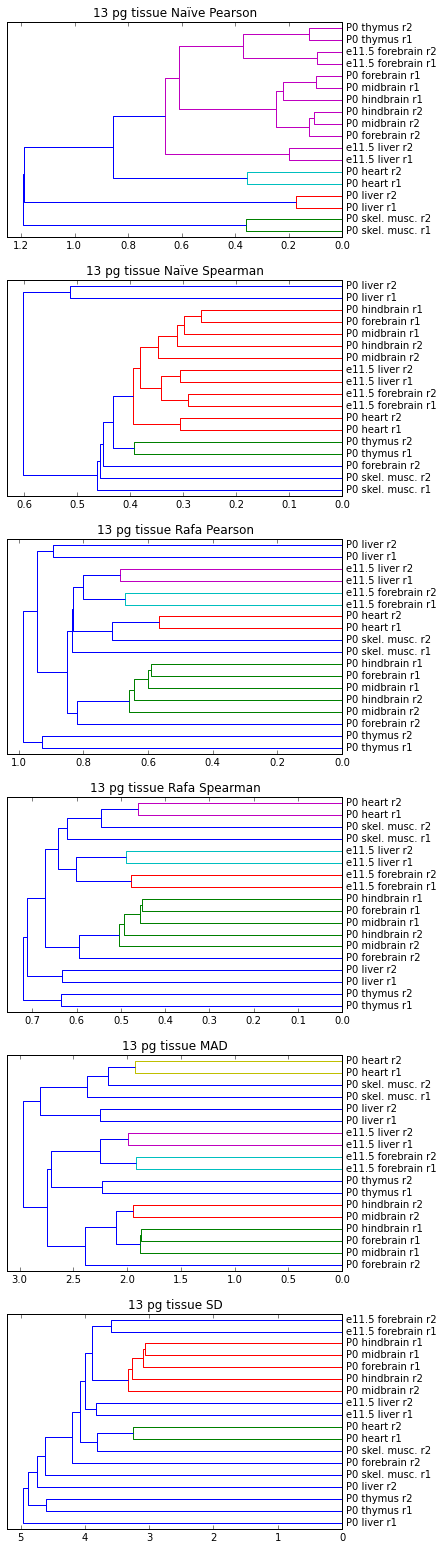

In [235]:
plot_dendogram_for_distances(tissue_13pg_scores, tissue_13pg_labels, '13 pg tissue')

## Plot dendrogram for 10 ng tissue

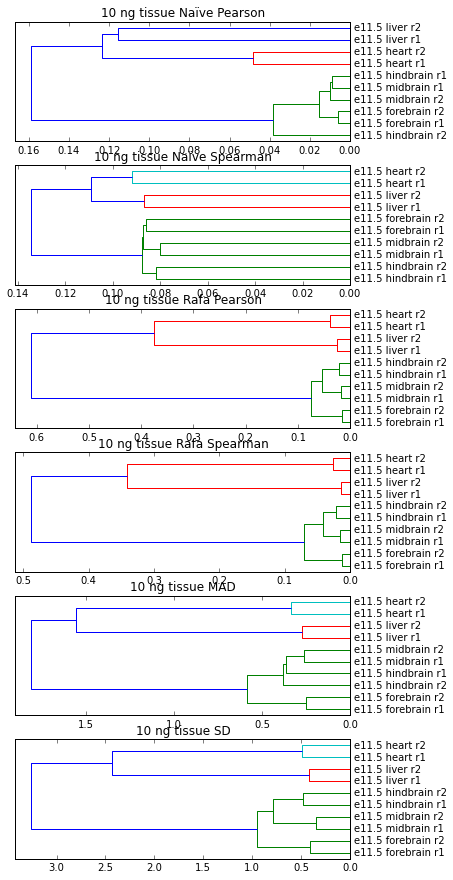

In [236]:
plot_dendogram_for_distances(tissue_10ng_scores, tissue_10ng_labels, '10 ng tissue')

## Plot dendrogram for bulk cell line

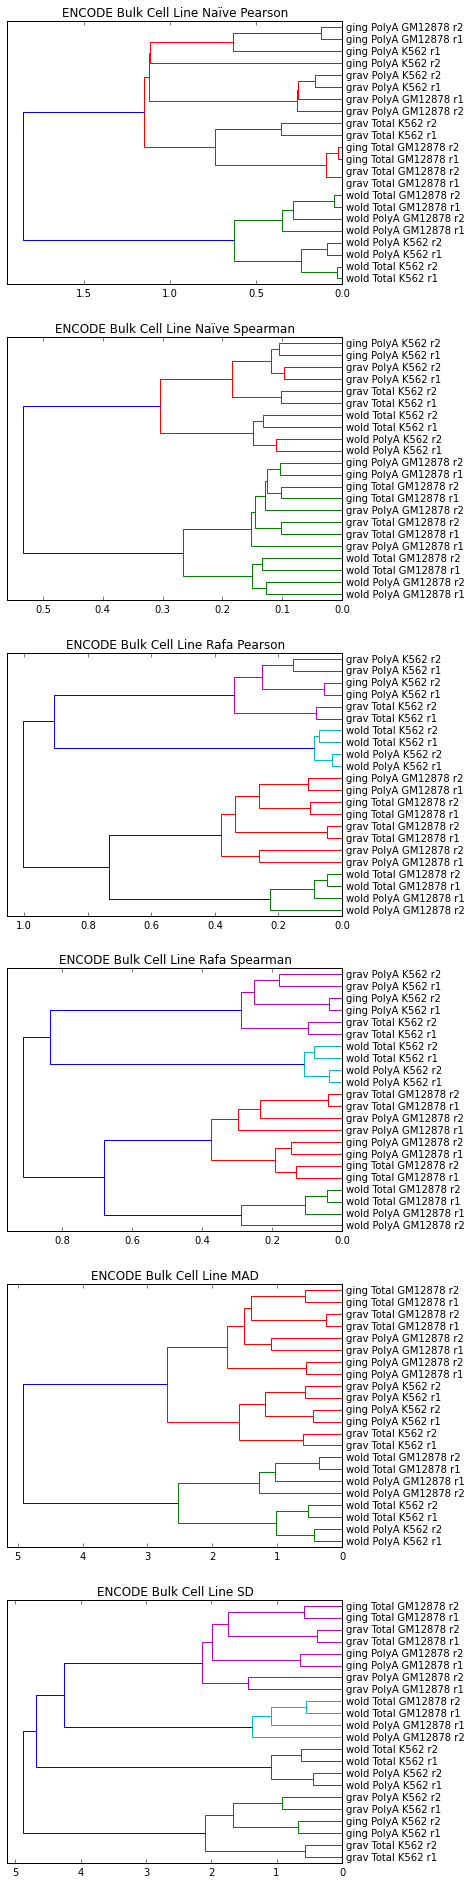

In [237]:
plot_dendogram_for_distances(bulk_cell_line_scores, bulk_cell_line_labels, 'ENCODE Bulk Cell Line')

# Conclusion

At least for the process of trying to verify that an 13 pg experiment performed as well as it could, it may be reasonable to only test replicate concordance by comparing transcripts above some FPKM threshold much higher than one. In this notebook I used a simple search, but it may be reasonable to see at what point the spike ins stop correlating well with themselves.

The justification for the higher threshold is that <a href="http://genome.cshlp.org/content/early/2013/12/03/gr.161034.113">From single-cell to cell-pool transcriptomes</a> figure 1, panel B and C, shows the probablity that the FPKM score is within 20% of the true value depends on the probability of being able to catch rare messages. Unfortunately it appears that the current chemistry still has a fairly low probability of being able to capture low abundance molecules.


# Future Work

* DONE Figure out how how to cluster on correlation scores to get related things next to each other.
* DONE Heat map of how much data is left after filtering.
* compute synthetic merged single cell data to compare against bulk data.
* DONE given a related tissue, show similar correlations plots between different amounts of input material.
  * also compare rank correlation of genes detected between 13 pg and 10 ng samples.
  * DONE venn diagrams of 13pg as subset of 10ng
    * what are those in the 13pg only?
  * fraction of reads mapped. how do the reads mapped change as we go from 1, 10, 50, 1000 cells...
    * we only have 13 pg and 10 ng
  * Brian needs to find wet bench QC e.g. yield, bioanalyzer distribution
* DONE invert colors for MAD. (apparently many pyplot colormaps have a _r variant)

